<a href="https://colab.research.google.com/github/zxb-97/NLP1/blob/main/Ghedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# 1. Importare le librerie necessarie
import pandas as pd

# 2. Caricare i dataset
# Sostituisci 'path_to_movies_metadata.csv' e 'path_to_credits.csv' con i percorsi effettivi dei tuoi file
movies_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
credits = pd.read_csv('credits.csv')

# 3. Visualizzare le prime 5 righe del dataset movies_metadata
print("Prime 5 righe di movies_metadata:")
print(movies_metadata.head())

# 4. Visualizzare le informazioni sulle colonne e i tipi di dati di movies_metadata
print("\nInformazioni su movies_metadata:")
print(movies_metadata.info())

# 5. Visualizzare le prime 5 righe del dataset credits
print("\nPrime 5 righe di credits:")
print(credits.head())

# 6. Visualizzare le informazioni sulle colonne e i tipi di dati di credits
print("\nInformazioni su credits:")
print(credits.info())

# 7. Verificare se ci sono valori mancanti nelle colonne chiave di movies_metadata
print("\nValori mancanti in movies_metadata:")
print(movies_metadata.isnull().sum())

# 8. Verificare se ci sono valori mancanti nelle colonne chiave di credits
print("\nValori mancanti in credits:")
print(credits.isnull().sum())

# 9. Visualizzare esempi di righe specifiche se necessario
# Ad esempio, visualizzare la riga con indice 100 del dataset movies_metadata
print("\nEsempio di una riga specifica in movies_metadata (indice 100):")
print(movies_metadata.iloc[100])

# Visualizzare la riga con indice 100 del dataset credits
print("\nEsempio di una riga specifica in credits (indice 100):")
print(credits.iloc[100])


Prime 5 righe di movies_metadata:
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                               

In [2]:
import pandas as pd
import ast

# Carica i dataset (sostituisci con i percorsi corretti)
metadata = pd.read_csv('movies_metadata.csv')  # metadata
credits = pd.read_csv('credits.csv')   # credits

# Converte entrambe le colonne 'id' in stringhe per evitare conflitti di tipo
metadata['id'] = metadata['id'].astype(str)
credits['id'] = credits['id'].astype(str)

# Funzione per estrarre il regista dalla colonna 'crew' nel file credits
def get_director(crew_data):
    try:
        crew = ast.literal_eval(crew_data)
        for person in crew:
            if person['job'] == 'Director':
                return person['name']
    except (ValueError, SyntaxError):
        return None
    return None

# Funzione per estrarre i primi 3 attori dalla colonna 'cast' nel file credits
def get_top_actors(cast_data, top_n=3):
    try:
        cast = ast.literal_eval(cast_data)
        return ', '.join([actor['name'] for actor in cast[:top_n]])
    except (ValueError, SyntaxError):
        return None

# Funzione per estrarre i generi dalla colonna 'genres' nel file metadata
def get_genres(genres_data):
    try:
        genres = ast.literal_eval(genres_data)
        return ', '.join([genre['name'] for genre in genres])
    except (ValueError, SyntaxError):
        return None

# Pre-processamento del dataset metadata
metadata['release_date'] = pd.to_datetime(metadata['release_date'], errors='coerce')
metadata['year'] = metadata['release_date'].dt.year

# Estrarre i generi dal JSON
metadata['genres'] = metadata['genres'].apply(get_genres)

# Pre-processamento del dataset credits per estrarre attori e regista
credits['top_3_actors'] = credits['cast'].apply(get_top_actors)
credits['director'] = credits['crew'].apply(get_director)

# Unisci i due dataset sul campo 'id' nel metadata e 'id' nel credits
merged_data = pd.merge(metadata, credits, left_on='id', right_on='id', how='inner')

# Seleziona le colonne rilevanti per il nuovo dataset
final_data = merged_data[['id','title', 'genres', 'top_3_actors', 'director', 'year',
                          'belongs_to_collection', 'vote_average', 'vote_count']]

# Esportare il nuovo dataset in un file CSV
final_data.to_csv('merged_movies_metadata.csv', index=False)

# Mostra le prime righe del nuovo dataset
print(final_data.head())


<ipython-input-2-0217fc8414da>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('movies_metadata.csv')  # metadata


      id                        title                      genres  \
0    862                    Toy Story   Animation, Comedy, Family   
1   8844                      Jumanji  Adventure, Fantasy, Family   
2  15602             Grumpier Old Men             Romance, Comedy   
3  31357            Waiting to Exhale      Comedy, Drama, Romance   
4  11862  Father of the Bride Part II                      Comedy   

                                      top_3_actors         director    year  \
0                Tom Hanks, Tim Allen, Don Rickles    John Lasseter  1995.0   
1     Robin Williams, Jonathan Hyde, Kirsten Dunst     Joe Johnston  1995.0   
2         Walter Matthau, Jack Lemmon, Ann-Margret    Howard Deutch  1995.0   
3  Whitney Houston, Angela Bassett, Loretta Devine  Forest Whitaker  1995.0   
4         Steve Martin, Diane Keaton, Martin Short    Charles Shyer  1995.0   

                               belongs_to_collection  vote_average  vote_count  
0  {'id': 10194, 'name': 'Toy

In [4]:
import pandas as pd

# Carica il dataset
metadata = pd.read_csv('movies_metadata.csv')  # sostituisci con il percorso corretto

# Verifica quanti valori NaN ci sono in 'vote_average' e 'vote_count'
nan_vote_average = metadata['vote_average'].isna().sum()
nan_vote_count = metadata['vote_count'].isna().sum()

# Visualizza i risultati
print(f"Valori NaN in 'vote_average': {nan_vote_average}")
print(f"Valori NaN in 'vote_count': {nan_vote_count}")


Valori NaN in 'vote_average': 6
Valori NaN in 'vote_count': 6


<ipython-input-4-56468c4ae041>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('movies_metadata.csv')  # sostituisci con il percorso corretto


In [5]:
import pandas as pd
import ast

# Carica il file CSV precedentemente creato (aggiorna il percorso con il tuo se necessario)
merged_data = pd.read_csv('merged_movies_metadata.csv')

# 1. Funzione per estrarre il nome della collezione dal campo JSON 'belongs_to_collection'
def get_collection(collection_data):
    try:
        collection = ast.literal_eval(collection_data)
        if collection and 'name' in collection:
            return collection['name']
    except (ValueError, SyntaxError):
        return "0"  # Assegna "0" se non appartiene a nessuna collezione o se c'è un errore
    return "0"

# Applica la funzione per gestire i valori di 'belongs_to_collection'
merged_data['belongs_to_collection'] = merged_data['belongs_to_collection'].apply(lambda x: get_collection(x) if pd.notnull(x) else "0")

# 2. Rimuovi i film con NaN in 'vote_average' o 'vote_count'
merged_data_cleaned = merged_data.dropna(subset=['vote_average', 'vote_count'])

# Esporta il nuovo dataset pulito
merged_data_cleaned.to_csv('merged_movies_metadata_cleaned.csv', index=False)

# Mostra le prime righe del nuovo dataset pulito
print(merged_data_cleaned.head())


      id                        title                      genres  \
0    862                    Toy Story   Animation, Comedy, Family   
1   8844                      Jumanji  Adventure, Fantasy, Family   
2  15602             Grumpier Old Men             Romance, Comedy   
3  31357            Waiting to Exhale      Comedy, Drama, Romance   
4  11862  Father of the Bride Part II                      Comedy   

                                      top_3_actors         director    year  \
0                Tom Hanks, Tim Allen, Don Rickles    John Lasseter  1995.0   
1     Robin Williams, Jonathan Hyde, Kirsten Dunst     Joe Johnston  1995.0   
2         Walter Matthau, Jack Lemmon, Ann-Margret    Howard Deutch  1995.0   
3  Whitney Houston, Angela Bassett, Loretta Devine  Forest Whitaker  1995.0   
4         Steve Martin, Diane Keaton, Martin Short    Charles Shyer  1995.0   

            belongs_to_collection  vote_average  vote_count  
0            Toy Story Collection           7.7 

In [6]:
import pandas as pd
import ast

# Carica i dataset: keywords e merged_movies_metadata_cleaned
keywords = pd.read_csv('keywords.csv')  # aggiorna il percorso con il tuo file
merged_data_cleaned = pd.read_csv('merged_movies_metadata_cleaned.csv')

# Funzione per estrarre le parole chiave dal campo JSON 'keywords'
def get_keywords(keyword_data):
    try:
        keywords_list = ast.literal_eval(keyword_data)
        return ', '.join([kw['name'] for kw in keywords_list])
    except (ValueError, SyntaxError):
        return ''

# Applica la funzione per estrarre le keywords e creare una nuova colonna 'keywords'
keywords['keywords'] = keywords['keywords'].apply(get_keywords)

# Unisci i due dataset utilizzando la chiave 'id' (che è 'Id' nel file keywords e 'id' nel file merged_data_cleaned)
merged_data_with_keywords = pd.merge(merged_data_cleaned, keywords[['id', 'keywords']], left_on='id', right_on='id', how='left')

# Esporta il nuovo dataset con le keywords aggiunte
merged_data_with_keywords.to_csv('merged_movies_metadata_with_keywords.csv', index=False)

# Mostra le prime righe del dataset finale
print(merged_data_with_keywords.head())


      id                        title                      genres  \
0    862                    Toy Story   Animation, Comedy, Family   
1   8844                      Jumanji  Adventure, Fantasy, Family   
2  15602             Grumpier Old Men             Romance, Comedy   
3  31357            Waiting to Exhale      Comedy, Drama, Romance   
4  11862  Father of the Bride Part II                      Comedy   

                                      top_3_actors         director    year  \
0                Tom Hanks, Tim Allen, Don Rickles    John Lasseter  1995.0   
1     Robin Williams, Jonathan Hyde, Kirsten Dunst     Joe Johnston  1995.0   
2         Walter Matthau, Jack Lemmon, Ann-Margret    Howard Deutch  1995.0   
3  Whitney Houston, Angela Bassett, Loretta Devine  Forest Whitaker  1995.0   
4         Steve Martin, Diane Keaton, Martin Short    Charles Shyer  1995.0   

            belongs_to_collection  vote_average  vote_count  \
0            Toy Story Collection           7.7

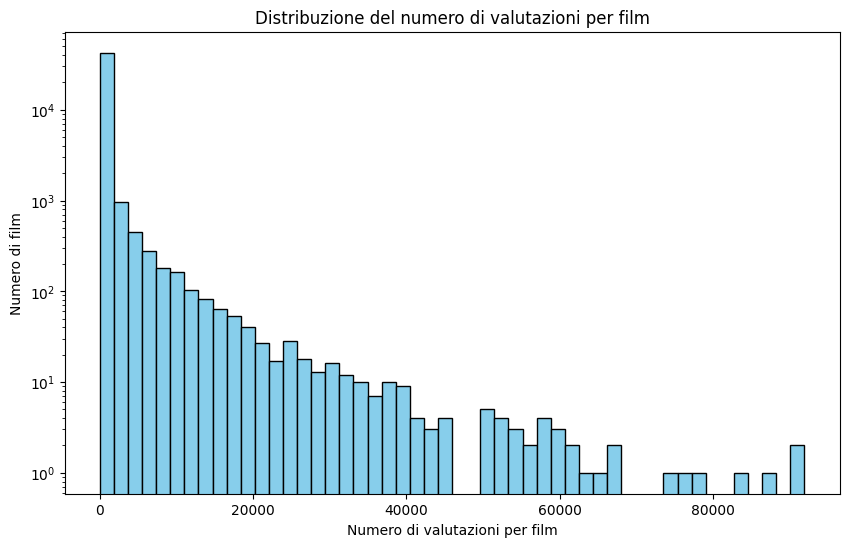

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file ratings.csv
ratings = pd.read_csv('ratings.csv')

# Conta il numero di valutazioni per ogni film (movieId)
ratings_count = ratings.groupby('movieId').size()

# Crea un grafico della distribuzione
plt.figure(figsize=(10,6))
plt.hist(ratings_count, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuzione del numero di valutazioni per film')
plt.xlabel('Numero di valutazioni per film')
plt.ylabel('Numero di film')
plt.yscale('log')  # Imposta la scala logaritmica per visualizzare meglio la distribuzione

# Mostra il grafico
plt.show()


In [8]:
# Controlla la distribuzione effettiva del numero di valutazioni per film
print(ratings_count.describe())

# Mostra i film con più valutazioni
print(ratings_count.sort_values(ascending=False).head(10))


count    45115.000000
mean       576.843378
std       3037.380582
min          1.000000
25%          2.000000
50%          8.000000
75%         69.000000
max      91921.000000
dtype: float64
movieId
356     91921
318     91082
296     87901
593     84078
2571    77960
260     77045
480     74355
527     67662
110     66512
1       66008
dtype: int64


In [9]:
import pandas as pd

# Carica il file ratings.csv
ratings = pd.read_csv('ratings.csv')

# Conta il numero di valutazioni per ogni film (movieId)
ratings_count = ratings.groupby('movieId').size()

# Calcola la media e il 75° percentile
media_valutazioni = ratings_count.mean()
percentile_75_valutazioni = ratings_count.quantile(0.75)

# Conta i film con numero di valutazioni sopra la media
film_sopra_media = (ratings_count > media_valutazioni).sum()

# Conta i film che rientrano nel 75° percentile
film_75_percentile = (ratings_count > percentile_75_valutazioni).sum()

# Mostra i risultati
print(f"Numero di film con valutazioni sopra la media: {film_sopra_media}")
print(f"Numero di film che rientrano nel 75° percentile: {film_75_percentile}")


Numero di film con valutazioni sopra la media: 4951
Numero di film che rientrano nel 75° percentile: 11233


In [10]:
import pandas as pd

# Carica il file movies_metadata.csv
movies_metadata = pd.read_csv('movies_metadata.csv')

# Converte la colonna release_date in formato datetime, ignorando eventuali errori
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')

# Conta i film con data di rilascio dopo il 2000
film_dopo_2000 = movies_metadata[movies_metadata['release_date'].dt.year > 2000].shape[0]

# Conta i film con data di rilascio prima o uguale al 2000
film_prima_2000 = movies_metadata[movies_metadata['release_date'].dt.year <= 2000].shape[0]

# Mostra i risultati
print(f"Numero di film rilasciati dopo il 2000: {film_dopo_2000}")
print(f"Numero di film rilasciati prima o nel 2000: {film_prima_2000}")


Numero di film rilasciati dopo il 2000: 23218
Numero di film rilasciati prima o nel 2000: 22158


<ipython-input-10-f27f3e43b977>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('movies_metadata.csv')


In [11]:
import pandas as pd

# Carica i file merged_movies_metadata_cleaned (1).csv e ratings.csv
movies_metadata = pd.read_csv('merged_movies_metadata_cleaned.csv')
ratings = pd.read_csv('ratings.csv')

# Rinomina "movieId" in "id" nel file ratings per poter fare il merge con movies_metadata
ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Assicurati che l'id in entrambi i DataFrame sia dello stesso tipo (stringa in questo caso)
ratings['id'] = ratings['id'].astype(str)
movies_metadata['id'] = movies_metadata['id'].astype(str)

# Conta il numero di valutazioni per ogni film
ratings_count = ratings.groupby('id').size()

# Unisci il numero di valutazioni al file movies_metadata
movies_metadata = pd.merge(movies_metadata, ratings_count.rename('rating_count'), on='id', how='left')

# Imposta NaN in rating_count a 0 per i film senza valutazioni
movies_metadata['rating_count'].fillna(0, inplace=True)

# Calcola la media e il 75° percentile
media_valutazioni = ratings_count.mean()
percentile_75_valutazioni = 69  # Hai specificato che il 75° percentile è 69 valutazioni

# Filtra i film usciti prima e dopo il 2000
film_prima_2000 = movies_metadata[movies_metadata['year'] <= 2000]
film_dopo_2000 = movies_metadata[movies_metadata['year'] > 2000]

# Conta i film prima del 2000 che superano la media e il 75° percentile
film_prima_2000_sopra_media = film_prima_2000[film_prima_2000['rating_count'] > media_valutazioni].shape[0]
film_prima_2000_sopra_75_percentile = film_prima_2000[film_prima_2000['rating_count'] > percentile_75_valutazioni].shape[0]

# Conta i film dopo il 2000 che superano la media e il 75° percentile
film_dopo_2000_sopra_media = film_dopo_2000[film_dopo_2000['rating_count'] > media_valutazioni].shape[0]
film_dopo_2000_sopra_75_percentile = film_dopo_2000[film_dopo_2000['rating_count'] > percentile_75_valutazioni].shape[0]

# Mostra i risultati
print(f"Film usciti prima del 2000 che superano la media delle valutazioni: {film_prima_2000_sopra_media}")
print(f"Film usciti prima del 2000 che superano il 75° percentile (69 valutazioni): {film_prima_2000_sopra_75_percentile}")
print(f"Film usciti dopo il 2000 che superano la media delle valutazioni: {film_dopo_2000_sopra_media}")
print(f"Film usciti dopo il 2000 che superano il 75° percentile (69 valutazioni): {film_dopo_2000_sopra_75_percentile}")


Film usciti prima del 2000 che superano la media delle valutazioni: 1118
Film usciti prima del 2000 che superano il 75° percentile (69 valutazioni): 2139
Film usciti dopo il 2000 che superano la media delle valutazioni: 645
Film usciti dopo il 2000 che superano il 75° percentile (69 valutazioni): 1251


In [12]:
import pandas as pd

# Carica il file ratings.csv
ratings = pd.read_csv('ratings.csv')

# Filtra il dataset per il film con movieId 862
ratings_film_862 = ratings[ratings['movieId'] == 862]

# Calcola il voto medio del film con movieId 862
voto_medio_film_862 = ratings_film_862['rating'].mean()

# Mostra il voto medio
print(f"Il voto medio del film con movieId 862 è: {voto_medio_film_862}")


Il voto medio del film con movieId 862 è: 3.5989304812834226


In [13]:
import pandas as pd

# Carica il dataset 'movies_metadata.csv'
movies_metadata = pd.read_csv('movies_metadata.csv')

# Estrai solo le colonne 'id' e 'vote_average'
movies_filtered = movies_metadata[['id', 'vote_average']].copy()

# Normalizza la colonna 'vote_average' dalla scala 0-10 a 0-5
movies_filtered['vote_average_normalized'] = movies_filtered['vote_average'] / 2

# Esporta il nuovo file in un CSV
movies_filtered.to_csv('movies_id_vote_average_normalized.csv', index=False)

# Mostra un'anteprima dei dati
print(movies_filtered.head())


      id  vote_average  vote_average_normalized
0    862           7.7                     3.85
1   8844           6.9                     3.45
2  15602           6.5                     3.25
3  31357           6.1                     3.05
4  11862           5.7                     2.85


<ipython-input-13-b640cb8ca08f>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('movies_metadata.csv')


In [14]:
import pandas as pd

# Carica i file
metadata_with_keywords = pd.read_csv('merged_movies_metadata_with_keywords.csv')
vote_average_normalized = pd.read_csv('movies_id_vote_average_normalized.csv')

# Converti entrambe le colonne 'id' in stringhe per essere sicuri che coincidano
metadata_with_keywords['id'] = metadata_with_keywords['id'].astype(str)
vote_average_normalized['id'] = vote_average_normalized['id'].astype(str)

# Unisci i due dataset sul campo 'id' per aggiungere il 'vote_average_normalized'
metadata_with_keywords_updated = pd.merge(metadata_with_keywords, vote_average_normalized[['id', 'vote_average_normalized']], on='id', how='left')

# Salva il nuovo dataset aggiornato
metadata_with_keywords_updated.to_csv('merged_movies_metadata_with_keywords_updated.csv', index=False)

# Visualizza le prime righe per verificare
print(metadata_with_keywords_updated.head())


      id                        title                      genres  \
0    862                    Toy Story   Animation, Comedy, Family   
1   8844                      Jumanji  Adventure, Fantasy, Family   
2  15602             Grumpier Old Men             Romance, Comedy   
3  31357            Waiting to Exhale      Comedy, Drama, Romance   
4  11862  Father of the Bride Part II                      Comedy   

                                      top_3_actors         director    year  \
0                Tom Hanks, Tim Allen, Don Rickles    John Lasseter  1995.0   
1     Robin Williams, Jonathan Hyde, Kirsten Dunst     Joe Johnston  1995.0   
2         Walter Matthau, Jack Lemmon, Ann-Margret    Howard Deutch  1995.0   
3  Whitney Houston, Angela Bassett, Loretta Devine  Forest Whitaker  1995.0   
4         Steve Martin, Diane Keaton, Martin Short    Charles Shyer  1995.0   

            belongs_to_collection  vote_average  vote_count  \
0            Toy Story Collection           7.7

In [15]:
import pandas as pd

# Carica il file metadata aggiornato e il file delle valutazioni
metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')
ratings = pd.read_csv('ratings.csv')

# Step 1: Calcolare il numero medio di valutazioni per film in ratings.csv
rating_count_per_movie = ratings.groupby('movieId').size().reset_index(name='rating_count')
average_rating_count = rating_count_per_movie['rating_count'].mean()

# Step 2: Selezionare i film che hanno un numero di valutazioni maggiore o uguale alla media
movies_above_avg_ratings = rating_count_per_movie[rating_count_per_movie['rating_count'] >= average_rating_count]

# Rinominare 'movieId' in 'id' per collegare con il file metadata
movies_above_avg_ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Unire i dati delle valutazioni con il file metadata sul campo 'id'
metadata_with_ratings = pd.merge(metadata, movies_above_avg_ratings, on='id', how='left')

# Step 3: Selezionare i film usciti dal 2000 in poi
movies_post_2000 = metadata_with_ratings[metadata_with_ratings['year'] >= 2000]

# Step 4: Filtrare i film in base ai criteri descritti
# a) Il voto medio in ratings.csv non deve discostarsi di +-0.5 dal vote_average_normalized
mean_ratings_per_movie = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')
mean_ratings_per_movie.rename(columns={'movieId': 'id'}, inplace=True)

# Unire la media dei voti al dataset principale
movies_with_mean_rating = pd.merge(movies_post_2000, mean_ratings_per_movie, on='id', how='left')

# Filtrare i film che soddisfano il criterio di +-0.5 sulla media voto rispetto al vote_average_normalized
condition_media = (movies_with_mean_rating['mean_rating'] >= (movies_with_mean_rating['vote_average_normalized'] - 0.5)) & \
                  (movies_with_mean_rating['mean_rating'] <= (movies_with_mean_rating['vote_average_normalized'] + 0.5))

filtered_movies = movies_with_mean_rating[condition_media]

# b) Ponderare la media voto (peso 0,7) e il numero di valutazioni normalizzato (peso 0,3)
# Normalizzazione del numero di valutazioni
filtered_movies['rating_count_normalized'] = filtered_movies['rating_count'] / filtered_movies['rating_count'].max()

# Calcolo del punteggio ponderato
filtered_movies['punteggio'] = (0.7 * filtered_movies['mean_rating']) + (0.3 * filtered_movies['rating_count_normalized'])

# Selezionare i 10 film con il miglior punteggio
top_10_movies = filtered_movies.nlargest(10, 'punteggio')

# Visualizza la lista dei 10 film
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'punteggio']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_case1.csv', index=False)


<ipython-input-15-90a049dd8f30>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_above_avg_ratings.rename(columns={'movieId': 'id'}, inplace=True)


          id                   title  mean_rating  rating_count  punteggio
23709  48780                    Boat     4.078295       20276.0   2.936614
12601   1260  Lotte from Gadgetville     4.163554        4873.0   2.934149
7421    1254   Don't Worry, I'm Fine     4.128207        5768.0   2.913017
2118    1280                  3-Iron     4.114931        3563.0   2.894827
3305    1949                  Zodiac     4.110604        2301.0   2.886707
1639    2502    The Bourne Supremacy     3.978199       24678.0   2.884308
2021     670                  Oldboy     4.112805         820.0   2.882272
24239  68954               Longitude     3.978629       22460.0   2.875659
3236    1265    Bridge to Terabithia     3.879848       38672.0   2.871924
11173   2692           The Red Elvis     3.979886       20409.0   2.868265


<ipython-input-15-90a049dd8f30>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['rating_count_normalized'] = filtered_movies['rating_count'] / filtered_movies['rating_count'].max()
<ipython-input-15-90a049dd8f30>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_movies['punteggio'] = (0.7 * filtered_movies['mean_rating']) + (0.3 * filtered_movies['rating_count_normalized'])


In [16]:
import pandas as pd

# Carica il file metadata aggiornato e il file delle valutazioni
metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')
ratings = pd.read_csv('ratings.csv')

# Step 1: Calcolare il numero medio di valutazioni per film in ratings.csv
rating_count_per_movie = ratings.groupby('movieId').size().reset_index(name='rating_count')
average_rating_count = rating_count_per_movie['rating_count'].mean()

# Step 2: Selezionare i film che hanno un numero di valutazioni maggiore o uguale alla media
movies_above_avg_ratings = rating_count_per_movie[rating_count_per_movie['rating_count'] >= average_rating_count]

# Rinominare 'movieId' in 'id' per collegare con il file metadata
movies_above_avg_ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Unire i dati delle valutazioni con il file metadata sul campo 'id'
metadata_with_ratings = pd.merge(metadata, movies_above_avg_ratings, on='id', how='left')

# Step 3: Selezionare i film usciti dal 2000 in poi
movies_post_2000 = metadata_with_ratings[metadata_with_ratings['year'] >= 2000]

# Step 4: Filtrare i film in base ai criteri descritti
# a) Il voto medio in ratings.csv non deve discostarsi di +-0.5 dal vote_average_normalized
mean_ratings_per_movie = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')
mean_ratings_per_movie.rename(columns={'movieId': 'id'}, inplace=True)

# Unire la media dei voti al dataset principale
movies_with_mean_rating = pd.merge(movies_post_2000, mean_ratings_per_movie, on='id', how='left')

# Filtrare i film che soddisfano il criterio di +-0.5 sulla media voto rispetto al vote_average_normalized
condition_media = (movies_with_mean_rating['mean_rating'] >= (movies_with_mean_rating['vote_average_normalized'] - 0.5)) & \
                  (movies_with_mean_rating['mean_rating'] <= (movies_with_mean_rating['vote_average_normalized'] + 0.5))

filtered_movies = movies_with_mean_rating[condition_media]

# Step 5: Ordinare i film in base alla media voto (senza ponderazione con il numero di valutazioni)
# Selezionare i 10 film con la media voto più alta
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Visualizza la lista dei 10 film
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_case1_no_ponderation.csv', index=False)


<ipython-input-16-064c0c8eca7d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_above_avg_ratings.rename(columns={'movieId': 'id'}, inplace=True)


           id                        title  mean_rating  rating_count
15621  137853          Journey to Planet X     5.000000           NaN
19321  129518                Island Guests     4.333333           NaN
9212   137182  The Broken Circle Breakdown     4.250000           NaN
12982   80337        These Amazing Shadows     4.187500           NaN
12601    1260       Lotte from Gadgetville     4.163554        4873.0
7421     1254        Don't Worry, I'm Fine     4.128207        5768.0
2118     1280                       3-Iron     4.114931        3563.0
2021      670                       Oldboy     4.112805         820.0
3305     1949                       Zodiac     4.110604        2301.0
23709   48780                         Boat     4.078295       20276.0


In [17]:
import pandas as pd

# Carica il file metadata aggiornato e il file delle valutazioni
metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')
ratings = pd.read_csv('ratings.csv')

# Step 1: Calcolare il numero medio di valutazioni per film in ratings.csv
rating_count_per_movie = ratings.groupby('movieId').size().reset_index(name='rating_count')
average_rating_count = rating_count_per_movie['rating_count'].mean()

# Step 2: Selezionare i film che hanno un numero di valutazioni maggiore o uguale alla media
movies_above_avg_ratings = rating_count_per_movie[rating_count_per_movie['rating_count'] >= average_rating_count]

# Rinominare 'movieId' in 'id' per collegare con il file metadata
movies_above_avg_ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Unire i dati delle valutazioni con il file metadata sul campo 'id'
metadata_with_ratings = pd.merge(metadata, movies_above_avg_ratings, on='id', how='left')

# Rimuovere i film con NaN nel rating_count
metadata_with_ratings.dropna(subset=['rating_count'], inplace=True)

# Step 3: Selezionare i film usciti dal 2000 in poi
movies_post_2000 = metadata_with_ratings[metadata_with_ratings['year'] >= 2000]

# Step 4: Filtrare i film in base ai criteri descritti
# a) Il voto medio in ratings.csv non deve discostarsi di +-0.5 dal vote_average_normalized
mean_ratings_per_movie = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')
mean_ratings_per_movie.rename(columns={'movieId': 'id'}, inplace=True)

# Unire la media dei voti al dataset principale
movies_with_mean_rating = pd.merge(movies_post_2000, mean_ratings_per_movie, on='id', how='left')

# Filtrare i film che soddisfano il criterio di +-0.5 sulla media voto rispetto al vote_average_normalized
condition_media = (movies_with_mean_rating['mean_rating'] >= (movies_with_mean_rating['vote_average_normalized'] - 0.5)) & \
                  (movies_with_mean_rating['mean_rating'] <= (movies_with_mean_rating['vote_average_normalized'] + 0.5))

filtered_movies = movies_with_mean_rating[condition_media]

# Step 5: Ordinare i film in base alla media voto (senza ponderazione con il numero di valutazioni)
# Selezionare i 10 film con la media voto più alta
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Visualizza la lista dei 10 film
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_case1_no_ponderation.csv', index=False)


<ipython-input-17-d74d6cba5726>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_above_avg_ratings.rename(columns={'movieId': 'id'}, inplace=True)


        id                   title  mean_rating  rating_count
635   1260  Lotte from Gadgetville     4.163554        4873.0
576   1254   Don't Worry, I'm Fine     4.128207        5768.0
278   1280                  3-Iron     4.114931        3563.0
261    670                  Oldboy     4.112805         820.0
429   1949                  Zodiac     4.110604        2301.0
706  48780                    Boat     4.078295       20276.0
414   1251   Letters from Iwo Jima     4.022186        3651.0
214    246                Zatoichi     4.004338       11412.0
640   8014       Valley of Flowers     3.997436        2145.0
259    363                 Head-On     3.995441         658.0


In [18]:
import pandas as pd

# Carica il file metadata aggiornato e il file delle valutazioni
metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')
ratings = pd.read_csv('ratings.csv')

# Step 1: Calcolare il numero medio di valutazioni per film in ratings.csv
rating_count_per_movie = ratings.groupby('movieId').size().reset_index(name='rating_count')
average_rating_count = rating_count_per_movie['rating_count'].mean()

# Step 2: Selezionare i film che hanno un numero di valutazioni maggiore o uguale alla media
movies_above_avg_ratings = rating_count_per_movie[rating_count_per_movie['rating_count'] >= average_rating_count]

# Rinominare 'movieId' in 'id' per collegare con il file metadata
movies_above_avg_ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Unire i dati delle valutazioni con il file metadata sul campo 'id'
metadata_with_ratings = pd.merge(metadata, movies_above_avg_ratings, on='id', how='left')

# Rimuovere i film con NaN nel rating_count
metadata_with_ratings.dropna(subset=['rating_count'], inplace=True)

# Step 3: Selezionare i film usciti dal 2000 in poi
movies_post_2000 = metadata_with_ratings[metadata_with_ratings['year'] >= 2005]

# Step 4: Filtrare i film in base ai criteri descritti
# a) Il voto medio in ratings.csv non deve discostarsi di +-0.5 dal vote_average_normalized
mean_ratings_per_movie = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')
mean_ratings_per_movie.rename(columns={'movieId': 'id'}, inplace=True)

# Unire la media dei voti al dataset principale
movies_with_mean_rating = pd.merge(movies_post_2000, mean_ratings_per_movie, on='id', how='left')

# Filtrare i film che soddisfano il criterio di +-0.5 sulla media voto rispetto al vote_average_normalized
condition_media = (movies_with_mean_rating['mean_rating'] >= (movies_with_mean_rating['vote_average_normalized'] - 0.5)) & \
                  (movies_with_mean_rating['mean_rating'] <= (movies_with_mean_rating['vote_average_normalized'] + 0.5))

filtered_movies = movies_with_mean_rating[condition_media]

# Step 5: Ordinare i film in base alla media voto (senza ponderazione con il numero di valutazioni)
# Selezionare i 10 film con la media voto più alta
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Visualizza la lista dei 10 film
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_case1_no_ponderation.csv', index=False)


<ipython-input-18-3d06667789d8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_above_avg_ratings.rename(columns={'movieId': 'id'}, inplace=True)


        id                                       title  mean_rating  \
310   1260                      Lotte from Gadgetville     4.163554   
259   1254                       Don't Worry, I'm Fine     4.128207   
123   1949                                      Zodiac     4.110604   
360  48780                                        Boat     4.078295   
109   1251                       Letters from Iwo Jima     4.022186   
313   8014                           Valley of Flowers     3.997436   
295   2692                               The Red Elvis     3.979886   
64      58  Pirates of the Caribbean: Dead Man's Chest     3.965011   
42     116                                 Match Point     3.920597   
189   6023                             P.S. I Love You     3.896352   

     rating_count  
310        4873.0  
259        5768.0  
123        2301.0  
360       20276.0  
109        3651.0  
313        2145.0  
295       20409.0  
64        13347.0  
42         1039.0  
189         603.0 

In [19]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola la media del numero di valutazioni nel file ratings.csv
media_ratings = ratings_count['rating_count'].mean()

# Calcola la media delle valutazioni (vote_count) nel file merged_movies_metadata_with_keywords_updated.csv
media_votes_count = movies_metadata['vote_count'].mean()

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_avg_ratings = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_avg_ratings = pd.merge(movies_above_avg_ratings, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero minimo di valutazioni in ratings.csv (>= alla media)
movies_above_avg_ratings = movies_above_avg_ratings[movies_above_avg_ratings['rating_count'] >= media_ratings]

# Applica il filtro per il numero minimo di valutazioni in vote_count (>= alla media)
movies_above_avg_ratings = movies_above_avg_ratings[movies_above_avg_ratings['vote_count'] >= media_votes_count]

# Filtra per i film usciti dopo il 2005
movies_post_2005 = movies_above_avg_ratings[movies_above_avg_ratings['year'] >= 2005]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_2005['mean_rating'] >= (movies_post_2005['vote_average_normalized'] - 0.5)) & \
                  (movies_post_2005['mean_rating'] <= (movies_post_2005['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_2005[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])


        id                                       title  mean_rating  \
4138  1254                       Don't Worry, I'm Fine     4.128207   
2908  1949                                      Zodiac     4.110604   
2864  1251                       Letters from Iwo Jima     4.022186   
2733    58  Pirates of the Caribbean: Dead Man's Chest     3.965011   
2634   116                                 Match Point     3.920597   
3123  6023                             P.S. I Love You     3.896352   
2879  1265                        Bridge to Terabithia     3.879848   
2553   501                                 Grizzly Man     3.828960   
3511  7445                                    Brothers     3.806181   
2512   921                              Cinderella Man     3.786230   

      rating_count  vote_count  
4138          5768       168.0  
2908          2301      2080.0  
2864          3651       553.0  
2733         13347      5380.0  
2634          1039      1134.0  
3123           603  

In [20]:
# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_2005_media both.csv', index=False)

In [21]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola la media del numero di valutazioni nel file ratings.csv
media_ratings = ratings_count['rating_count'].mean()

# Calcola la media delle valutazioni (vote_count) nel file merged_movies_metadata_with_keywords_updated.csv
media_votes_count = movies_metadata['vote_count'].mean()

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_avg_ratings = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_avg_ratings = pd.merge(movies_above_avg_ratings, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero minimo di valutazioni in ratings.csv (>= alla media)
movies_above_avg_ratings = movies_above_avg_ratings[movies_above_avg_ratings['rating_count'] >= media_ratings]

# Applica il filtro per il numero minimo di valutazioni in vote_count (>= alla media)
movies_above_avg_ratings = movies_above_avg_ratings[movies_above_avg_ratings['vote_count'] >= media_votes_count]

# Filtra per i film usciti dopo il 1995
movies_post_1995 = movies_above_avg_ratings[movies_above_avg_ratings['year'] >= 1995]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_1995['mean_rating'] >= (movies_post_1995['vote_average_normalized'] - 0.5)) & \
                  (movies_post_1995['mean_rating'] <= (movies_post_1995['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_1995[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_1995_media both.csv', index=False)

        id                  title  mean_rating  rating_count  vote_count
4138  1254  Don't Worry, I'm Fine     4.128207          5768       168.0
2395  1280                 3-Iron     4.114931          3563       225.0
2365   670                 Oldboy     4.112805           820      2000.0
798    745        The Sixth Sense     4.112609         13649      3223.0
2908  1949                 Zodiac     4.110604          2301      2080.0
2864  1251  Letters from Iwo Jima     4.022186          3651       553.0
2047   246               Zatoichi     4.004338         11412       236.0
2362   363                Head-On     3.995441           658       111.0
2096  2502   The Bourne Supremacy     3.978199         24678      2873.0
1880  1278           The Dreamers     3.968559         17334       680.0


In [22]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola il 75° percentile del numero di valutazioni nel file ratings.csv
percentile_75_ratings = ratings_count['rating_count'].quantile(0.75)

# Calcola il 75° percentile delle valutazioni (vote_count) nel file merged_movies_metadata_with_keywords_updated.csv
percentile_75_votes_count = movies_metadata['vote_count'].quantile(0.75)

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_percentile = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_percentile = pd.merge(movies_above_percentile, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero minimo di valutazioni in ratings.csv (>= al 75° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['rating_count'] >= percentile_75_ratings]

# Applica il filtro per il numero minimo di valutazioni in vote_count (>= al 75° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['vote_count'] >= percentile_75_votes_count]

# Filtra per i film usciti dopo il 1995
movies_post_1995 = movies_above_percentile[movies_above_percentile['year'] >= 1995]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_1995['mean_rating'] >= (movies_post_1995['vote_average_normalized'] - 0.5)) & \
                  (movies_post_1995['mean_rating'] <= (movies_post_1995['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_1995[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_1995_percentile_75.csv', index=False)


        id                  title  mean_rating  rating_count  vote_count
4138  1254  Don't Worry, I'm Fine     4.128207          5768       168.0
2395  1280                 3-Iron     4.114931          3563       225.0
2365   670                 Oldboy     4.112805           820      2000.0
798    745        The Sixth Sense     4.112609         13649      3223.0
2908  1949                 Zodiac     4.110604          2301      2080.0
2864  1251  Letters from Iwo Jima     4.022186          3651       553.0
2047   246               Zatoichi     4.004338         11412       236.0
2362   363                Head-On     3.995441           658       111.0
2096  2502   The Bourne Supremacy     3.978199         24678      2873.0
1880  1278           The Dreamers     3.968559         17334       680.0


In [23]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola il 75° percentile del numero di valutazioni nel file ratings.csv
percentile_75_ratings = ratings_count['rating_count'].quantile(0.75)

# Calcola il 75° percentile delle valutazioni (vote_count) nel file merged_movies_metadata_with_keywords_updated.csv
percentile_75_votes_count = movies_metadata['vote_count'].quantile(0.75)

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_percentile = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_percentile = pd.merge(movies_above_percentile, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero minimo di valutazioni in ratings.csv (>= al 75° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['rating_count'] >= percentile_75_ratings]

# Applica il filtro per il numero minimo di valutazioni in vote_count (>= al 75° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['vote_count'] >= percentile_75_votes_count]

# Filtra per i film usciti dopo il 2005
movies_post_1995 = movies_above_percentile[movies_above_percentile['year'] >= 2005]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_2005['mean_rating'] >= (movies_post_2005['vote_average_normalized'] - 0.5)) & \
                  (movies_post_2005['mean_rating'] <= (movies_post_2005['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_2005[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])



        id                                       title  mean_rating  \
4138  1254                       Don't Worry, I'm Fine     4.128207   
2908  1949                                      Zodiac     4.110604   
2864  1251                       Letters from Iwo Jima     4.022186   
2733    58  Pirates of the Caribbean: Dead Man's Chest     3.965011   
2634   116                                 Match Point     3.920597   
3123  6023                             P.S. I Love You     3.896352   
2879  1265                        Bridge to Terabithia     3.879848   
2553   501                                 Grizzly Man     3.828960   
3511  7445                                    Brothers     3.806181   
2512   921                              Cinderella Man     3.786230   

      rating_count  vote_count  
4138          5768       168.0  
2908          2301      2080.0  
2864          3651       553.0  
2733         13347      5380.0  
2634          1039      1134.0  
3123           603  

In [24]:
# Calcola la media del numero di valutazioni nel file ratings.csv
media_ratings = ratings_count['rating_count'].mean()

# Calcola il 75° percentile del numero di valutazioni nel file ratings.csv
percentile_75_ratings = ratings_count['rating_count'].quantile(0.75)

print(f"Media delle valutazioni per film: {media_ratings}")
print(f"75° percentile delle valutazioni per film: {percentile_75_ratings}")


Media delle valutazioni per film: 576.8433780339134
75° percentile delle valutazioni per film: 69.0


In [25]:
# Calcola la media e il 75° percentile per vote_count
media_votes_count = movies_metadata['vote_count'].mean()
percentile_75_votes_count = movies_metadata['vote_count'].quantile(0.75)

print(f"Media di vote_count: {media_votes_count}")
print(f"75° percentile di vote_count: {percentile_75_votes_count}")


Media di vote_count: 107.78456913827655
75° percentile di vote_count: 34.0


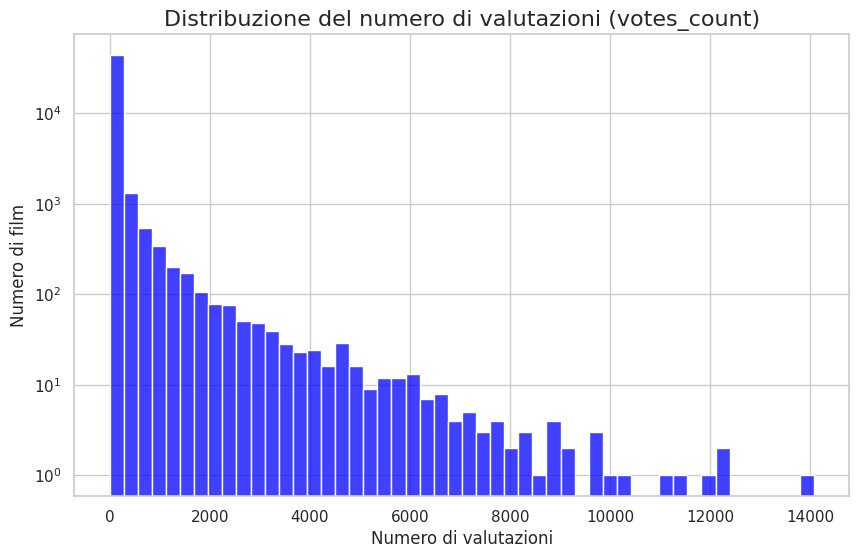

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leggi il file 'merged_movies_metadata_with_keywords_updated.csv'
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Imposta lo stile per il grafico
sns.set(style="whitegrid")

# Crea un istogramma per visualizzare la distribuzione di 'votes_count'
plt.figure(figsize=(10, 6))
sns.histplot(movies_metadata['vote_count'], bins=50, kde=False, color="blue")

# Imposta il titolo e le etichette del grafico
plt.title('Distribuzione del numero di valutazioni (votes_count)', fontsize=16)
plt.xlabel('Numero di valutazioni', fontsize=12)
plt.ylabel('Numero di film', fontsize=12)

# Mostra il grafico
plt.yscale('log')  # Se necessario, imposta la scala logaritmica sull'asse Y per una migliore visibilità
plt.show()


In [27]:
import pandas as pd

# Leggi il file merged_movies_metadata_with_keywords_updated.csv
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero totale di film
total_films = len(movies_metadata)

# Film con più di 500 valutazioni
films_over_500 = len(movies_metadata[movies_metadata['vote_count'] > 500])
percent_over_500 = (films_over_500 / total_films) * 100

# Film con più di 1000 valutazioni
films_over_1000 = len(movies_metadata[movies_metadata['vote_count'] > 1000])
percent_over_1000 = (films_over_1000 / total_films) * 100

# Film con più di 5000 valutazioni
films_over_5000 = len(movies_metadata[movies_metadata['vote_count'] > 5000])
percent_over_5000 = (films_over_5000 / total_films) * 100

# Stampa i risultati
print(f"Film con più di 500 valutazioni: {films_over_500} ({percent_over_500:.2f}%)")
print(f"Film con più di 1000 valutazioni: {films_over_1000} ({percent_over_1000:.2f}%)")
print(f"Film con più di 5000 valutazioni: {films_over_5000} ({percent_over_5000:.2f}%)")


Film con più di 500 valutazioni: 2063 (4.40%)
Film con più di 1000 valutazioni: 1128 (2.40%)
Film con più di 5000 valutazioni: 101 (0.22%)


In [28]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola la media del numero di valutazioni nel file ratings.csv
media_ratings = ratings_count['rating_count'].mean()

# Calcola il 90° percentile del numero di valutazioni nel file merged_movies_metadata_with_keywords_updated.csv
percentile_90_votes_count = movies_metadata['vote_count'].quantile(0.90)

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_avg_ratings = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_avg_ratings = pd.merge(movies_above_avg_ratings, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero minimo di valutazioni in ratings.csv (>= alla media)
movies_above_avg_ratings = movies_above_avg_ratings[movies_above_avg_ratings['rating_count'] >= media_ratings]

# Applica il filtro per il numero di valutazioni in vote_count (>= al 90° percentile)
movies_above_avg_ratings = movies_above_avg_ratings[movies_above_avg_ratings['vote_count'] >= percentile_90_votes_count]

# Filtra per i film usciti dopo il 1995
movies_post_1995 = movies_above_avg_ratings[movies_above_avg_ratings['year'] >= 1995]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_1995['mean_rating'] >= (movies_post_1995['vote_average_normalized'] - 0.5)) & \
                  (movies_post_1995['mean_rating'] <= (movies_post_1995['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_1995[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_1995_media_percentile_90.csv', index=False)


        id                                       title  mean_rating  \
4138  1254                       Don't Worry, I'm Fine     4.128207   
2395  1280                                      3-Iron     4.114931   
2365   670                                      Oldboy     4.112805   
798    745                             The Sixth Sense     4.112609   
2908  1949                                      Zodiac     4.110604   
2864  1251                       Letters from Iwo Jima     4.022186   
2047   246                                    Zatoichi     4.004338   
2096  2502                        The Bourne Supremacy     3.978199   
1880  1278                                The Dreamers     3.968559   
2733    58  Pirates of the Caribbean: Dead Man's Chest     3.965011   

      rating_count  vote_count  
4138          5768       168.0  
2395          3563       225.0  
2365           820      2000.0  
798          13649      3223.0  
2908          2301      2080.0  
2864          3651  

In [29]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola la media del numero di valutazioni nel file ratings.csv
media_ratings = ratings_count['rating_count'].mean()

# Calcola il 90° percentile del numero di valutazioni nel file merged_movies_metadata_with_keywords_updated.csv
percentile_95_votes_count = movies_metadata['vote_count'].quantile(0.95)

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_avg_ratings = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_avg_ratings = pd.merge(movies_above_avg_ratings, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero minimo di valutazioni in ratings.csv (>= alla media)
movies_above_avg_ratings = movies_above_avg_ratings[movies_above_avg_ratings['rating_count'] >= media_ratings]

# Applica il filtro per il numero di valutazioni in vote_count (>= al 95° percentile)
movies_above_avg_ratings = movies_above_avg_ratings[movies_above_avg_ratings['vote_count'] >= percentile_95_votes_count]

# Filtra per i film usciti dopo il 2005
movies_post_2005 = movies_above_avg_ratings[movies_above_avg_ratings['year'] >= 2005]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_2005['mean_rating'] >= (movies_post_2005['vote_average_normalized'] - 0.5)) & \
                  (movies_post_2005['mean_rating'] <= (movies_post_2005['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_2005[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_2005_media_percentile_95.csv', index=False)


        id                                       title  mean_rating  \
2908  1949                                      Zodiac     4.110604   
2864  1251                       Letters from Iwo Jima     4.022186   
2733    58  Pirates of the Caribbean: Dead Man's Chest     3.965011   
2634   116                                 Match Point     3.920597   
3123  6023                             P.S. I Love You     3.896352   
2879  1265                        Bridge to Terabithia     3.879848   
3511  7445                                    Brothers     3.806181   
2512   921                              Cinderella Man     3.786230   
2777  1948                                       Crank     3.769618   
2515   272                               Batman Begins     3.737873   

      rating_count  vote_count  
2908          2301      2080.0  
2864          3651       553.0  
2733         13347      5380.0  
2634          1039      1134.0  
3123           603      1011.0  
2879         38672  

In [31]:
import pandas as pd

# Leggi il file ratings.csv
ratings = pd.read_csv('ratings.csv')

# Calcola il numero di valutazioni per ogni film
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Totale dei film
total_movies = len(ratings_count)

# Film con più di 500 valutazioni
over_500 = ratings_count[ratings_count['rating_count'] > 500].shape[0]
percent_over_500 = (over_500 / total_movies) * 100

# Film con più di 1000 valutazioni
over_1000 = ratings_count[ratings_count['rating_count'] > 1000].shape[0]
percent_over_1000 = (over_1000 / total_movies) * 100

# Film con più di 5000 valutazioni
over_5000 = ratings_count[ratings_count['rating_count'] > 5000].shape[0]
percent_over_5000 = (over_5000 / total_movies) * 100

# Stampa i risultati
print(f"Film con più di 500 valutazioni: {over_500} ({percent_over_500:.2f}% del totale)")
print(f"Film con più di 1000 valutazioni: {over_1000} ({percent_over_1000:.2f}% del totale)")
print(f"Film con più di 5000 valutazioni: {over_5000} ({percent_over_5000:.2f}% del totale)")


Film con più di 500 valutazioni: 5291 (11.73% del totale)
Film con più di 1000 valutazioni: 3744 (8.30% del totale)
Film con più di 5000 valutazioni: 1270 (2.82% del totale)


In [32]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola il 95° percentile del numero di valutazioni nel file ratings.csv
percentile_95_ratings = ratings_count['rating_count'].quantile(0.95)

# Calcola il 95° percentile del numero di valutazioni (vote_count) nel file merged_movies_metadata_with_keywords_updated.csv
percentile_95_votes_count = movies_metadata['vote_count'].quantile(0.95)

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_percentile = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_percentile = pd.merge(movies_above_percentile, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero di valutazioni in ratings.csv (>= al 95° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['rating_count'] >= percentile_95_ratings]

# Applica il filtro per il numero di valutazioni in vote_count (>= al 95° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['vote_count'] >= percentile_95_votes_count]

# Filtra per i film usciti dopo il 2005
movies_post_2005 = movies_above_percentile[movies_above_percentile['year'] >= 2005]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_2005['mean_rating'] >= (movies_post_2005['vote_average_normalized'] - 0.5)) & \
                  (movies_post_2005['mean_rating'] <= (movies_post_2005['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_2005[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_2005_percentile_95_both.csv', index=False)


        id                                       title  mean_rating  \
2908  1949                                      Zodiac     4.110604   
2864  1251                       Letters from Iwo Jima     4.022186   
2733    58  Pirates of the Caribbean: Dead Man's Chest     3.965011   
2879  1265                        Bridge to Terabithia     3.879848   
3511  7445                                    Brothers     3.806181   
2512   921                              Cinderella Man     3.786230   
2515   272                               Batman Begins     3.737873   
2913  1271                                         300     3.726079   
2830  1124                                The Prestige     3.687686   
2614    25                                     Jarhead     3.667513   

      rating_count  vote_count  
2908          2301      2080.0  
2864          3651       553.0  
2733         13347      5380.0  
2879         38672      1146.0  
3511          7280       650.0  
2512          2491  

In [33]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola il 95° percentile del numero di valutazioni nel file ratings.csv
percentile_95_ratings = ratings_count['rating_count'].quantile(0.95)

# Calcola il 95° percentile del numero di valutazioni (vote_count) nel file merged_movies_metadata_with_keywords_updated.csv
percentile_95_votes_count = movies_metadata['vote_count'].quantile(0.95)

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_percentile = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_percentile = pd.merge(movies_above_percentile, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero di valutazioni in ratings.csv (>= al 95° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['rating_count'] >= percentile_95_ratings]

# Applica il filtro per il numero di valutazioni in vote_count (>= al 95° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['vote_count'] >= percentile_95_votes_count]

# Filtra per i film usciti dopo il 1995
movies_post_1995 = movies_above_percentile[movies_above_percentile['year'] >= 1995]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_1995['mean_rating'] >= (movies_post_1995['vote_average_normalized'] - 0.5)) & \
                  (movies_post_1995['mean_rating'] <= (movies_post_1995['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_1995[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_1995_percentile_95_both.csv', index=False)


        id                                       title  mean_rating  \
798    745                             The Sixth Sense     4.112609   
2908  1949                                      Zodiac     4.110604   
2864  1251                       Letters from Iwo Jima     4.022186   
2096  2502                        The Bourne Supremacy     3.978199   
1880  1278                                The Dreamers     3.968559   
2733    58  Pirates of the Caribbean: Dead Man's Chest     3.965011   
497   4995                               Boogie Nights     3.957019   
2      949                                        Heat     3.905544   
2879  1265                        Bridge to Terabithia     3.879848   
882    497                              The Green Mile     3.870980   

      rating_count  vote_count  
798          13649      3223.0  
2908          2301      2080.0  
2864          3651       553.0  
2096         24678      2873.0  
1880         17334       680.0  
2733         13347  

In [34]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola il 95° percentile del numero di valutazioni nel file ratings.csv
percentile_95_ratings = ratings_count['rating_count'].quantile(0.95)

# Calcola il 95° percentile del numero di valutazioni (vote_count) nel file merged_movies_metadata_with_keywords_updated.csv
percentile_95_votes_count = movies_metadata['vote_count'].quantile(0.95)

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_percentile = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_percentile = pd.merge(movies_above_percentile, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero di valutazioni in ratings.csv (>= al 95° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['rating_count'] >= percentile_95_ratings]

# Applica il filtro per il numero di valutazioni in vote_count (>= al 95° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['vote_count'] >= percentile_95_votes_count]

# Filtra per i film usciti dopo il 1995
movies_post_1995 = movies_above_percentile[movies_above_percentile['year'] >= 1995]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_1995['mean_rating'] >= (movies_post_1995['vote_average_normalized'] - 0.5)) & \
                  (movies_post_1995['mean_rating'] <= (movies_post_1995['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_1995[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_1995_percentile_95_both.csv', index=False)


        id                                       title  mean_rating  \
798    745                             The Sixth Sense     4.112609   
2908  1949                                      Zodiac     4.110604   
2864  1251                       Letters from Iwo Jima     4.022186   
2096  2502                        The Bourne Supremacy     3.978199   
1880  1278                                The Dreamers     3.968559   
2733    58  Pirates of the Caribbean: Dead Man's Chest     3.965011   
497   4995                               Boogie Nights     3.957019   
2      949                                        Heat     3.905544   
2879  1265                        Bridge to Terabithia     3.879848   
882    497                              The Green Mile     3.870980   

      rating_count  vote_count  
798          13649      3223.0  
2908          2301      2080.0  
2864          3651       553.0  
2096         24678      2873.0  
1880         17334       680.0  
2733         13347  

In [35]:
import pandas as pd

# Leggi i file necessari
ratings = pd.read_csv('ratings.csv')
movies_metadata = pd.read_csv('merged_movies_metadata_with_keywords_updated.csv')

# Calcola il numero di valutazioni per ogni film nel file ratings.csv
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Calcola la media delle valutazioni per ogni film nel file ratings.csv
mean_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='mean_rating')

# Calcola il 97,5° percentile del numero di valutazioni nel file ratings.csv
percentile_97_5_ratings = ratings_count['rating_count'].quantile(0.975)

# Calcola il 95° percentile del numero di valutazioni (vote_count) nel file merged_movies_metadata_with_keywords_updated.csv
percentile_95_votes_count = movies_metadata['vote_count'].quantile(0.95)

# Unisci il numero di valutazioni e la media dei voti con il file dei film
movies_above_percentile = pd.merge(movies_metadata, ratings_count, left_on='id', right_on='movieId')
movies_above_percentile = pd.merge(movies_above_percentile, mean_ratings, left_on='id', right_on='movieId')

# Applica il filtro per il numero di valutazioni in ratings.csv (>= al 97,5° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['rating_count'] >= percentile_97_5_ratings]

# Applica il filtro per il numero di valutazioni in vote_count (>= al 95° percentile)
movies_above_percentile = movies_above_percentile[movies_above_percentile['vote_count'] >= percentile_95_votes_count]

# Filtra per i film usciti dopo il 2005
movies_post_2005 = movies_above_percentile[movies_above_percentile['year'] >= 2005]

# Filtro per il criterio della media del voto +- 0.5
condition_media = (movies_post_2005['mean_rating'] >= (movies_post_2005['vote_average_normalized'] - 0.5)) & \
                  (movies_post_2005['mean_rating'] <= (movies_post_2005['vote_average_normalized'] + 0.5))

# Applica il filtro
filtered_movies = movies_post_2005[condition_media]

# Ordina per la media del voto e seleziona i migliori 10
top_10_movies = filtered_movies.nlargest(10, 'mean_rating')

# Mostra la lista dei 10 film più popolari
print(top_10_movies[['id', 'title', 'mean_rating', 'rating_count', 'vote_count']])

# Esportare il risultato in un file CSV se necessario
top_10_movies.to_csv('top_10_movies_2005_percentile_97_5_ratings_95_votes.csv', index=False)


        id                                       title  mean_rating  \
2733    58  Pirates of the Caribbean: Dead Man's Chest     3.965011   
2879  1265                        Bridge to Terabithia     3.879848   
3511  7445                                    Brothers     3.806181   
2515   272                               Batman Begins     3.737873   
2913  1271                                         300     3.726079   
2614    25                                     Jarhead     3.667513   
3395  2080                    X-Men Origins: Wolverine     3.571165   
3061  2011                                  Persepolis     3.505491   
2732   350                       The Devil Wears Prada     3.465261   
2849  1372                               Blood Diamond     3.295603   

      rating_count  vote_count  
2733         13347      5380.0  
2879         38672      1146.0  
3511          7280       650.0  
2515          8370      7511.0  
2913         10357      5092.0  
2614         24619  

In [38]:
# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Rinomina la colonna 'movieId' in 'id' per poter fare il merge con il file dei voti attesi
ratings.rename(columns={'movieId': 'id'}, inplace=True)



In [41]:
# Verifica i nomi delle colonne nel file ratings
print(ratings.columns)

# Verifica i nomi delle colonne nel file expected_ratings
print(expected_ratings.columns)



Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['id', 'title', 'genres', 'top_3_actors', 'director', 'year',
       'belongs_to_collection', 'vote_average', 'vote_count', 'keywords',
       'vote_average_normalized', 'movieId_x', 'rating_count', 'movieId_y',
       'mean_rating'],
      dtype='object')


In [44]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Carica il file con i voti attesi
expected_ratings = pd.read_csv('top_10_movies_2005_media both.csv')

# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Rinomina la colonna 'movieId' in 'id' per uniformarla ai voti attesi
ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Filtra solo gli utenti che hanno valutato i film nella lista dei top 10
filtered_ratings = ratings[ratings['id'].isin(expected_ratings['id'])]

# Imposta il numero di fold per la cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Esempio con 5-fold cross-validation

# Inizializza liste per memorizzare i risultati delle metriche per ogni fold
rmse_case1_list, mae_case1_list, r2_case1_list, precision_case1_list = [], [], [], []
rmse_case2_list, mae_case2_list, r2_case2_list, precision_case2_list = [], [], [], []

# Funzione per normalizzare i voti attesi (caso 2)
def normalize_rating(rating):
    if rating <= 0.24:
        return 0
    elif 0.25 <= rating <= 0.74:
        return 0.5
    elif 0.75 <= rating <= 1.25:
        return 1
    elif 1.26 <= rating <= 1.74:
        return 1.5
    elif 1.75 <= rating <= 2.25:
        return 2
    elif 2.26 <= rating <= 2.74:
        return 2.5
    elif 2.75 <= rating <= 3.25:
        return 3
    elif 3.26 <= rating <= 3.74:
        return 3.5
    elif 3.75 <= rating <= 4.25:
        return 4
    elif 4.26 <= rating <= 4.74:
        return 4.5
    else:
        return 5

# Esegui k-fold cross-validation
for train_index, test_index in kfold.split(filtered_ratings):
    train_set = filtered_ratings.iloc[train_index]
    test_set = filtered_ratings.iloc[test_index]

    # Unisci i voti attesi con i voti reali basati sull'ID del film nel test set
    merged_test_set = pd.merge(test_set, expected_ratings, on='id')

    # CASO 1: Calcolo delle metriche con i voti attesi originali (usando mean_rating)
    y_true = merged_test_set['rating']  # Voti reali degli utenti
    y_pred_case1 = merged_test_set['mean_rating']  # Voti attesi originali (mean_rating)

    rmse_case1_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case1)))
    mae_case1_list.append(mean_absolute_error(y_true, y_pred_case1))
    r2_case1_list.append(r2_score(y_true, y_pred_case1))
    precision_case1_list.append(sum(abs(y_true - y_pred_case1) <= 1) / len(y_true))

    # CASO 2: Normalizza i voti attesi (mean_rating) per il confronto
    merged_test_set['normalized_expected_rating'] = merged_test_set['mean_rating'].apply(normalize_rating)
    y_pred_case2 = merged_test_set['normalized_expected_rating']  # Voti attesi normalizzati

    rmse_case2_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case2)))
    mae_case2_list.append(mean_absolute_error(y_true, y_pred_case2))
    r2_case2_list.append(r2_score(y_true, y_pred_case2))
    precision_case2_list.append(sum(abs(y_true - y_pred_case2) <= 1) / len(y_true))

# Risultati medi delle metriche per i due casi
print("CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case1_list)}')
print(f'MAE medio: {np.mean(mae_case1_list)}')
print(f'R-squared medio: {np.mean(r2_case1_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case1_list)}')

print("\nCASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case2_list)}')
print(f'MAE medio: {np.mean(mae_case2_list)}')
print(f'R-squared medio: {np.mean(r2_case2_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case2_list)}')


CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:
RMSE medio: 0.9095858100182899
MAE medio: 0.6914333932687321
R-squared medio: 0.00952273995684958
Precision (tolleranza ±1) media: 0.7129763646582419

CASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:
RMSE medio: 0.9178095261323304
MAE medio: 0.6611109886355375
R-squared medio: -0.008466552845757392
Precision (tolleranza ±1) media: 0.9210076751126632


In [45]:
# Seleziona un numero di esempi da mostrare
num_examples = 5  # Modifica questo numero per visualizzare più o meno esempi

# Seleziona a caso un sottoinsieme di utenti
examples = merged_test_set.sample(n=num_examples, random_state=42)

# Stampa i risultati per entrambi i casi (originale e normalizzato)
print("Esempi di voti reali e previsioni - Caso 1 (voti attesi originali):\n")
for index, row in examples.iterrows():
    print(f"User ID: {row['userId']}, Film ID: {row['id']}")
    print(f"Voto reale: {row['rating']}, Voto atteso (originale): {row['mean_rating']}\n")

print("\nEsempi di voti reali e previsioni - Caso 2 (voti attesi normalizzati):\n")
for index, row in examples.iterrows():
    print(f"User ID: {row['userId']}, Film ID: {row['id']}")
    print(f"Voto reale: {row['rating']}, Voto atteso (normalizzato): {row['normalized_expected_rating']}\n")


Esempi di voti reali e previsioni - Caso 1 (voti attesi originali):

User ID: 4841, Film ID: 1265
Voto reale: 3.0, Voto atteso (originale): 3.8798484691766655

User ID: 119300, Film ID: 1265
Voto reale: 4.0, Voto atteso (originale): 3.8798484691766655

User ID: 201137, Film ID: 1251
Voto reale: 4.5, Voto atteso (originale): 4.022185702547247

User ID: 53575, Film ID: 1265
Voto reale: 4.0, Voto atteso (originale): 3.8798484691766655

User ID: 31403, Film ID: 1265
Voto reale: 4.0, Voto atteso (originale): 3.8798484691766655


Esempi di voti reali e previsioni - Caso 2 (voti attesi normalizzati):

User ID: 4841, Film ID: 1265
Voto reale: 3.0, Voto atteso (normalizzato): 4

User ID: 119300, Film ID: 1265
Voto reale: 4.0, Voto atteso (normalizzato): 4

User ID: 201137, Film ID: 1251
Voto reale: 4.5, Voto atteso (normalizzato): 4

User ID: 53575, Film ID: 1265
Voto reale: 4.0, Voto atteso (normalizzato): 4

User ID: 31403, Film ID: 1265
Voto reale: 4.0, Voto atteso (normalizzato): 4



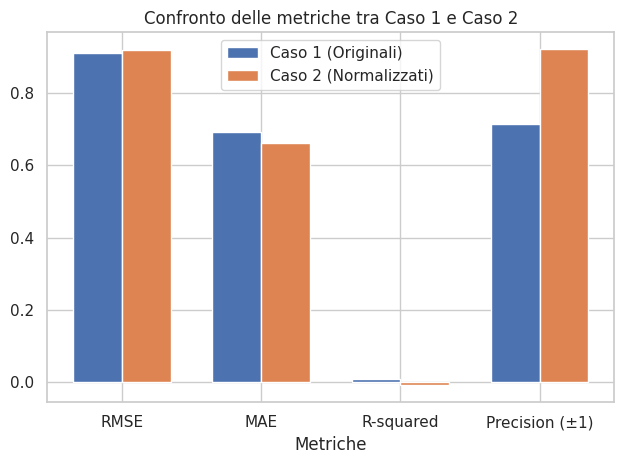

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Valori medi delle metriche per i due casi (quelli che hai fornito)
metrics = ['RMSE', 'MAE', 'R-squared', 'Precision (±1)']
case_1_values = [0.9096, 0.6914, 0.0095, 0.7130]
case_2_values = [0.9178, 0.6611, -0.0085, 0.9210]

# Configurazione del grafico
x = np.arange(len(metrics))
width = 0.35  # Larghezza delle barre

fig, ax = plt.subplots()
bars_case_1 = ax.bar(x - width/2, case_1_values, width, label='Caso 1 (Originali)')
bars_case_2 = ax.bar(x + width/2, case_2_values, width, label='Caso 2 (Normalizzati)')

# Aggiungi etichette e titolo
ax.set_xlabel('Metriche')
ax.set_title('Confronto delle metriche tra Caso 1 e Caso 2')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()


In [47]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Carica il file con i voti attesi
expected_ratings = pd.read_csv('top_10_movies_1995_media both.csv')

# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Rinomina la colonna 'movieId' in 'id' per uniformarla ai voti attesi
ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Filtra solo gli utenti che hanno valutato i film nella lista dei top 10
filtered_ratings = ratings[ratings['id'].isin(expected_ratings['id'])]

# Imposta il numero di fold per la cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Esempio con 5-fold cross-validation

# Inizializza liste per memorizzare i risultati delle metriche per ogni fold
rmse_case1_list, mae_case1_list, r2_case1_list, precision_case1_list = [], [], [], []
rmse_case2_list, mae_case2_list, r2_case2_list, precision_case2_list = [], [], [], []

# Funzione per normalizzare i voti attesi (caso 2)
def normalize_rating(rating):
    if rating <= 0.24:
        return 0
    elif 0.25 <= rating <= 0.74:
        return 0.5
    elif 0.75 <= rating <= 1.25:
        return 1
    elif 1.26 <= rating <= 1.74:
        return 1.5
    elif 1.75 <= rating <= 2.25:
        return 2
    elif 2.26 <= rating <= 2.74:
        return 2.5
    elif 2.75 <= rating <= 3.25:
        return 3
    elif 3.26 <= rating <= 3.74:
        return 3.5
    elif 3.75 <= rating <= 4.25:
        return 4
    elif 4.26 <= rating <= 4.74:
        return 4.5
    else:
        return 5

# Esegui k-fold cross-validation
for train_index, test_index in kfold.split(filtered_ratings):
    train_set = filtered_ratings.iloc[train_index]
    test_set = filtered_ratings.iloc[test_index]

    # Unisci i voti attesi con i voti reali basati sull'ID del film nel test set
    merged_test_set = pd.merge(test_set, expected_ratings, on='id')

    # CASO 1: Calcolo delle metriche con i voti attesi originali (usando mean_rating)
    y_true = merged_test_set['rating']  # Voti reali degli utenti
    y_pred_case1 = merged_test_set['mean_rating']  # Voti attesi originali (mean_rating)

    rmse_case1_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case1)))
    mae_case1_list.append(mean_absolute_error(y_true, y_pred_case1))
    r2_case1_list.append(r2_score(y_true, y_pred_case1))
    precision_case1_list.append(sum(abs(y_true - y_pred_case1) <= 1) / len(y_true))

    # CASO 2: Normalizza i voti attesi (mean_rating) per il confronto
    merged_test_set['normalized_expected_rating'] = merged_test_set['mean_rating'].apply(normalize_rating)
    y_pred_case2 = merged_test_set['normalized_expected_rating']  # Voti attesi normalizzati

    rmse_case2_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case2)))
    mae_case2_list.append(mean_absolute_error(y_true, y_pred_case2))
    r2_case2_list.append(r2_score(y_true, y_pred_case2))
    precision_case2_list.append(sum(abs(y_true - y_pred_case2) <= 1) / len(y_true))

# Risultati medi delle metriche per i due casi
print("CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case1_list)}')
print(f'MAE medio: {np.mean(mae_case1_list)}')
print(f'R-squared medio: {np.mean(r2_case1_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case1_list)}')

print("\nCASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case2_list)}')
print(f'MAE medio: {np.mean(mae_case2_list)}')
print(f'R-squared medio: {np.mean(r2_case2_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case2_list)}')


CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:
RMSE medio: 0.9154591473940107
MAE medio: 0.6747318268913246
R-squared medio: 0.004670549876055796
Precision (tolleranza ±1) media: 0.7493975839583842

CASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:
RMSE medio: 0.9179614377862573
MAE medio: 0.6653445931029024
R-squared medio: -0.00078100488163102
Precision (tolleranza ±1) media: 0.9306725062303747


In [48]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Carica il file con i voti attesi
expected_ratings = pd.read_csv('top_10_movies_2005_media_percentile_95.csv')

# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Rinomina la colonna 'movieId' in 'id' per uniformarla ai voti attesi
ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Filtra solo gli utenti che hanno valutato i film nella lista dei top 10
filtered_ratings = ratings[ratings['id'].isin(expected_ratings['id'])]

# Imposta il numero di fold per la cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Esempio con 5-fold cross-validation

# Inizializza liste per memorizzare i risultati delle metriche per ogni fold
rmse_case1_list, mae_case1_list, r2_case1_list, precision_case1_list = [], [], [], []
rmse_case2_list, mae_case2_list, r2_case2_list, precision_case2_list = [], [], [], []

# Funzione per normalizzare i voti attesi (caso 2)
def normalize_rating(rating):
    if rating <= 0.24:
        return 0
    elif 0.25 <= rating <= 0.74:
        return 0.5
    elif 0.75 <= rating <= 1.25:
        return 1
    elif 1.26 <= rating <= 1.74:
        return 1.5
    elif 1.75 <= rating <= 2.25:
        return 2
    elif 2.26 <= rating <= 2.74:
        return 2.5
    elif 2.75 <= rating <= 3.25:
        return 3
    elif 3.26 <= rating <= 3.74:
        return 3.5
    elif 3.75 <= rating <= 4.25:
        return 4
    elif 4.26 <= rating <= 4.74:
        return 4.5
    else:
        return 5

# Esegui k-fold cross-validation
for train_index, test_index in kfold.split(filtered_ratings):
    train_set = filtered_ratings.iloc[train_index]
    test_set = filtered_ratings.iloc[test_index]

    # Unisci i voti attesi con i voti reali basati sull'ID del film nel test set
    merged_test_set = pd.merge(test_set, expected_ratings, on='id')

    # CASO 1: Calcolo delle metriche con i voti attesi originali (usando mean_rating)
    y_true = merged_test_set['rating']  # Voti reali degli utenti
    y_pred_case1 = merged_test_set['mean_rating']  # Voti attesi originali (mean_rating)

    rmse_case1_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case1)))
    mae_case1_list.append(mean_absolute_error(y_true, y_pred_case1))
    r2_case1_list.append(r2_score(y_true, y_pred_case1))
    precision_case1_list.append(sum(abs(y_true - y_pred_case1) <= 1) / len(y_true))

    # CASO 2: Normalizza i voti attesi (mean_rating) per il confronto
    merged_test_set['normalized_expected_rating'] = merged_test_set['mean_rating'].apply(normalize_rating)
    y_pred_case2 = merged_test_set['normalized_expected_rating']  # Voti attesi normalizzati

    rmse_case2_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case2)))
    mae_case2_list.append(mean_absolute_error(y_true, y_pred_case2))
    r2_case2_list.append(r2_score(y_true, y_pred_case2))
    precision_case2_list.append(sum(abs(y_true - y_pred_case2) <= 1) / len(y_true))

# Risultati medi delle metriche per i due casi
print("CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case1_list)}')
print(f'MAE medio: {np.mean(mae_case1_list)}')
print(f'R-squared medio: {np.mean(r2_case1_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case1_list)}')

print("\nCASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case2_list)}')
print(f'MAE medio: {np.mean(mae_case2_list)}')
print(f'R-squared medio: {np.mean(r2_case2_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case2_list)}')


CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:
RMSE medio: 0.9117341017792515
MAE medio: 0.6969240504705844
R-squared medio: 0.008099377773966188
Precision (tolleranza ±1) media: 0.7074409535139046

CASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:
RMSE medio: 0.9224263475193609
MAE medio: 0.6743426232466512
R-squared medio: -0.015303004554963718
Precision (tolleranza ±1) media: 0.8998774358308477


In [49]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Carica il file con i voti attesi
expected_ratings = pd.read_csv('top_10_movies_2005_percentile_95_both.csv')

# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Rinomina la colonna 'movieId' in 'id' per uniformarla ai voti attesi
ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Filtra solo gli utenti che hanno valutato i film nella lista dei top 10
filtered_ratings = ratings[ratings['id'].isin(expected_ratings['id'])]

# Imposta il numero di fold per la cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Esempio con 5-fold cross-validation

# Inizializza liste per memorizzare i risultati delle metriche per ogni fold
rmse_case1_list, mae_case1_list, r2_case1_list, precision_case1_list = [], [], [], []
rmse_case2_list, mae_case2_list, r2_case2_list, precision_case2_list = [], [], [], []

# Funzione per normalizzare i voti attesi (caso 2)
def normalize_rating(rating):
    if rating <= 0.24:
        return 0
    elif 0.25 <= rating <= 0.74:
        return 0.5
    elif 0.75 <= rating <= 1.25:
        return 1
    elif 1.26 <= rating <= 1.74:
        return 1.5
    elif 1.75 <= rating <= 2.25:
        return 2
    elif 2.26 <= rating <= 2.74:
        return 2.5
    elif 2.75 <= rating <= 3.25:
        return 3
    elif 3.26 <= rating <= 3.74:
        return 3.5
    elif 3.75 <= rating <= 4.25:
        return 4
    elif 4.26 <= rating <= 4.74:
        return 4.5
    else:
        return 5

# Esegui k-fold cross-validation
for train_index, test_index in kfold.split(filtered_ratings):
    train_set = filtered_ratings.iloc[train_index]
    test_set = filtered_ratings.iloc[test_index]

    # Unisci i voti attesi con i voti reali basati sull'ID del film nel test set
    merged_test_set = pd.merge(test_set, expected_ratings, on='id')

    # CASO 1: Calcolo delle metriche con i voti attesi originali (usando mean_rating)
    y_true = merged_test_set['rating']  # Voti reali degli utenti
    y_pred_case1 = merged_test_set['mean_rating']  # Voti attesi originali (mean_rating)

    rmse_case1_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case1)))
    mae_case1_list.append(mean_absolute_error(y_true, y_pred_case1))
    r2_case1_list.append(r2_score(y_true, y_pred_case1))
    precision_case1_list.append(sum(abs(y_true - y_pred_case1) <= 1) / len(y_true))

    # CASO 2: Normalizza i voti attesi (mean_rating) per il confronto
    merged_test_set['normalized_expected_rating'] = merged_test_set['mean_rating'].apply(normalize_rating)
    y_pred_case2 = merged_test_set['normalized_expected_rating']  # Voti attesi normalizzati

    rmse_case2_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case2)))
    mae_case2_list.append(mean_absolute_error(y_true, y_pred_case2))
    r2_case2_list.append(r2_score(y_true, y_pred_case2))
    precision_case2_list.append(sum(abs(y_true - y_pred_case2) <= 1) / len(y_true))

# Risultati medi delle metriche per i due casi
print("CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case1_list)}')
print(f'MAE medio: {np.mean(mae_case1_list)}')
print(f'R-squared medio: {np.mean(r2_case1_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case1_list)}')

print("\nCASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case2_list)}')
print(f'MAE medio: {np.mean(mae_case2_list)}')
print(f'R-squared medio: {np.mean(r2_case2_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case2_list)}')


CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:
RMSE medio: 0.9452107174346599
MAE medio: 0.7353771538218669
R-squared medio: 0.01490635960452702
Precision (tolleranza ±1) media: 0.700042206811038

CASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:
RMSE medio: 0.9581646532193593
MAE medio: 0.7316552412095871
R-squared medio: -0.012285117082316433
Precision (tolleranza ±1) media: 0.830713987645756


In [50]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Carica il file con i voti attesi
expected_ratings = pd.read_csv('top_10_movies_1995_percentile_95_both.csv')

# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Rinomina la colonna 'movieId' in 'id' per uniformarla ai voti attesi
ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Filtra solo gli utenti che hanno valutato i film nella lista dei top 10
filtered_ratings = ratings[ratings['id'].isin(expected_ratings['id'])]

# Imposta il numero di fold per la cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Esempio con 5-fold cross-validation

# Inizializza liste per memorizzare i risultati delle metriche per ogni fold
rmse_case1_list, mae_case1_list, r2_case1_list, precision_case1_list = [], [], [], []
rmse_case2_list, mae_case2_list, r2_case2_list, precision_case2_list = [], [], [], []

# Funzione per normalizzare i voti attesi (caso 2)
def normalize_rating(rating):
    if rating <= 0.24:
        return 0
    elif 0.25 <= rating <= 0.74:
        return 0.5
    elif 0.75 <= rating <= 1.25:
        return 1
    elif 1.26 <= rating <= 1.74:
        return 1.5
    elif 1.75 <= rating <= 2.25:
        return 2
    elif 2.26 <= rating <= 2.74:
        return 2.5
    elif 2.75 <= rating <= 3.25:
        return 3
    elif 3.26 <= rating <= 3.74:
        return 3.5
    elif 3.75 <= rating <= 4.25:
        return 4
    elif 4.26 <= rating <= 4.74:
        return 4.5
    else:
        return 5

# Esegui k-fold cross-validation
for train_index, test_index in kfold.split(filtered_ratings):
    train_set = filtered_ratings.iloc[train_index]
    test_set = filtered_ratings.iloc[test_index]

    # Unisci i voti attesi con i voti reali basati sull'ID del film nel test set
    merged_test_set = pd.merge(test_set, expected_ratings, on='id')

    # CASO 1: Calcolo delle metriche con i voti attesi originali (usando mean_rating)
    y_true = merged_test_set['rating']  # Voti reali degli utenti
    y_pred_case1 = merged_test_set['mean_rating']  # Voti attesi originali (mean_rating)

    rmse_case1_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case1)))
    mae_case1_list.append(mean_absolute_error(y_true, y_pred_case1))
    r2_case1_list.append(r2_score(y_true, y_pred_case1))
    precision_case1_list.append(sum(abs(y_true - y_pred_case1) <= 1) / len(y_true))

    # CASO 2: Normalizza i voti attesi (mean_rating) per il confronto
    merged_test_set['normalized_expected_rating'] = merged_test_set['mean_rating'].apply(normalize_rating)
    y_pred_case2 = merged_test_set['normalized_expected_rating']  # Voti attesi normalizzati

    rmse_case2_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case2)))
    mae_case2_list.append(mean_absolute_error(y_true, y_pred_case2))
    r2_case2_list.append(r2_score(y_true, y_pred_case2))
    precision_case2_list.append(sum(abs(y_true - y_pred_case2) <= 1) / len(y_true))

# Risultati medi delle metriche per i due casi
print("CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case1_list)}')
print(f'MAE medio: {np.mean(mae_case1_list)}')
print(f'R-squared medio: {np.mean(r2_case1_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case1_list)}')

print("\nCASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case2_list)}')
print(f'MAE medio: {np.mean(mae_case2_list)}')
print(f'R-squared medio: {np.mean(r2_case2_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case2_list)}')


CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:
RMSE medio: 0.8924118847172198
MAE medio: 0.6664143367546336
R-squared medio: 0.0058195091615896866
Precision (tolleranza ±1) media: 0.7167069178153564

CASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:
RMSE medio: 0.8963337896062489
MAE medio: 0.6455664495441699
R-squared medio: -0.0029379362775571404
Precision (tolleranza ±1) media: 0.9262514158853946


In [51]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Carica il file con i voti attesi
expected_ratings = pd.read_csv('top_10_movies_2005_percentile_97_5_ratings_95_votes.csv')

# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Rinomina la colonna 'movieId' in 'id' per uniformarla ai voti attesi
ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Filtra solo gli utenti che hanno valutato i film nella lista dei top 10
filtered_ratings = ratings[ratings['id'].isin(expected_ratings['id'])]

# Imposta il numero di fold per la cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Esempio con 5-fold cross-validation

# Inizializza liste per memorizzare i risultati delle metriche per ogni fold
rmse_case1_list, mae_case1_list, r2_case1_list, precision_case1_list = [], [], [], []
rmse_case2_list, mae_case2_list, r2_case2_list, precision_case2_list = [], [], [], []

# Funzione per normalizzare i voti attesi (caso 2)
def normalize_rating(rating):
    if rating <= 0.24:
        return 0
    elif 0.25 <= rating <= 0.74:
        return 0.5
    elif 0.75 <= rating <= 1.25:
        return 1
    elif 1.26 <= rating <= 1.74:
        return 1.5
    elif 1.75 <= rating <= 2.25:
        return 2
    elif 2.26 <= rating <= 2.74:
        return 2.5
    elif 2.75 <= rating <= 3.25:
        return 3
    elif 3.26 <= rating <= 3.74:
        return 3.5
    elif 3.75 <= rating <= 4.25:
        return 4
    elif 4.26 <= rating <= 4.74:
        return 4.5
    else:
        return 5

# Esegui k-fold cross-validation
for train_index, test_index in kfold.split(filtered_ratings):
    train_set = filtered_ratings.iloc[train_index]
    test_set = filtered_ratings.iloc[test_index]

    # Unisci i voti attesi con i voti reali basati sull'ID del film nel test set
    merged_test_set = pd.merge(test_set, expected_ratings, on='id')

    # CASO 1: Calcolo delle metriche con i voti attesi originali (usando mean_rating)
    y_true = merged_test_set['rating']  # Voti reali degli utenti
    y_pred_case1 = merged_test_set['mean_rating']  # Voti attesi originali (mean_rating)

    rmse_case1_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case1)))
    mae_case1_list.append(mean_absolute_error(y_true, y_pred_case1))
    r2_case1_list.append(r2_score(y_true, y_pred_case1))
    precision_case1_list.append(sum(abs(y_true - y_pred_case1) <= 1) / len(y_true))

    # CASO 2: Normalizza i voti attesi (mean_rating) per il confronto
    merged_test_set['normalized_expected_rating'] = merged_test_set['mean_rating'].apply(normalize_rating)
    y_pred_case2 = merged_test_set['normalized_expected_rating']  # Voti attesi normalizzati

    rmse_case2_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case2)))
    mae_case2_list.append(mean_absolute_error(y_true, y_pred_case2))
    r2_case2_list.append(r2_score(y_true, y_pred_case2))
    precision_case2_list.append(sum(abs(y_true - y_pred_case2) <= 1) / len(y_true))

# Risultati medi delle metriche per i due casi
print("CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case1_list)}')
print(f'MAE medio: {np.mean(mae_case1_list)}')
print(f'R-squared medio: {np.mean(r2_case1_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case1_list)}')

print("\nCASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case2_list)}')
print(f'MAE medio: {np.mean(mae_case2_list)}')
print(f'R-squared medio: {np.mean(r2_case2_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case2_list)}')


CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:
RMSE medio: 0.9504367745036817
MAE medio: 0.7467627850504535
R-squared medio: 0.03971219526596113
Precision (tolleranza ±1) media: 0.7089136852991751

CASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:
RMSE medio: 0.9602237574610483
MAE medio: 0.7440825263498849
R-squared medio: 0.019834723587931303
Precision (tolleranza ±1) media: 0.806745328437208


In [52]:
# prompt: mostrami 5 esempi di cui sopra

# Seleziona 5 esempi casuali dal dataset 'merged_test_set'
sample_examples = merged_test_set.sample(n=5)

# Stampa gli esempi
print(sample_examples[['id', 'userId', 'rating', 'mean_rating', 'normalized_expected_rating']])


         id  userId  rating  mean_rating  normalized_expected_rating
30610   350  164289     3.0     3.465261                         3.5
31137   350  205647     3.5     3.465261                         3.5
13738  2011  143898     4.0     3.505491                         3.5
9502   1265  209514     1.0     3.879848                         4.0
19711  2080  131393     4.5     3.571165                         3.5


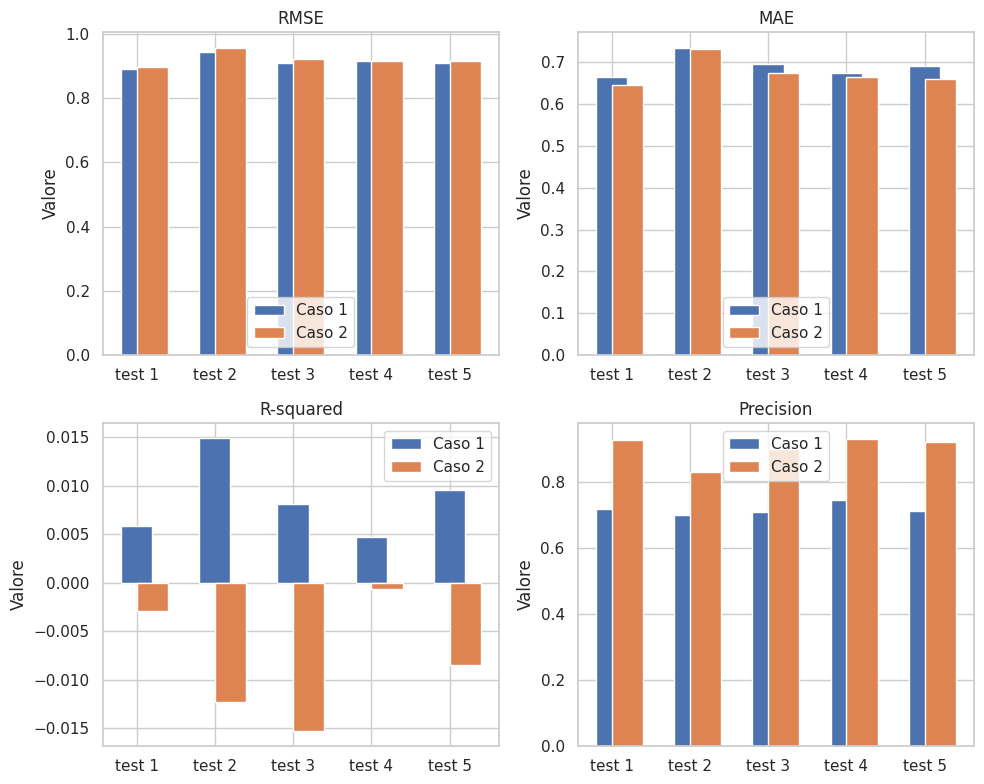

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Dati delle metriche per i sei esperimenti (per ciascuna metrica)
metrics = ['RMSE', 'MAE', 'R-squared', 'Precision']
case_1_values = [
    [0.8924, 0.9452, 0.9117, 0.9155, 0.9096],  # RMSE per Caso 1
    [0.6664, 0.7354, 0.6969, 0.6747, 0.6914],  # MAE per Caso 1
    [0.0058, 0.0149, 0.0081, 0.0047, 0.0095],  # R-squared per Caso 1
    [0.7167, 0.7004, 0.7074, 0.7439, 0.7130]   # Precision per Caso 1
]

case_2_values = [
    [0.8963, 0.9581, 0.9224, 0.9179, 0.9178],  # RMSE per Caso 2
    [0.6456, 0.7317, 0.6743, 0.6653, 0.6611],  # MAE per Caso 2
    [-0.0029, -0.0123, -0.0153, -0.0007, -0.0085],  # R-squared per Caso 2
    [0.9263, 0.8307, 0.8998, 0.9307, 0.9210]   # Precision per Caso 2
]

# Configurazione del grafico
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

metric_names = ['RMSE', 'MAE', 'R-squared', 'Precision']
x_labels = [f'test {i+1}' for i in range(5)]

for i, ax in enumerate(axes):
    ax.bar(x_labels, case_1_values[i], width=0.4, label='Caso 1', align='center')
    ax.bar(x_labels, case_2_values[i], width=0.4, label='Caso 2', align='edge')
    ax.set_title(metric_names[i])
    ax.set_ylabel('Valore')
    ax.legend()

plt.tight_layout()
plt.show()


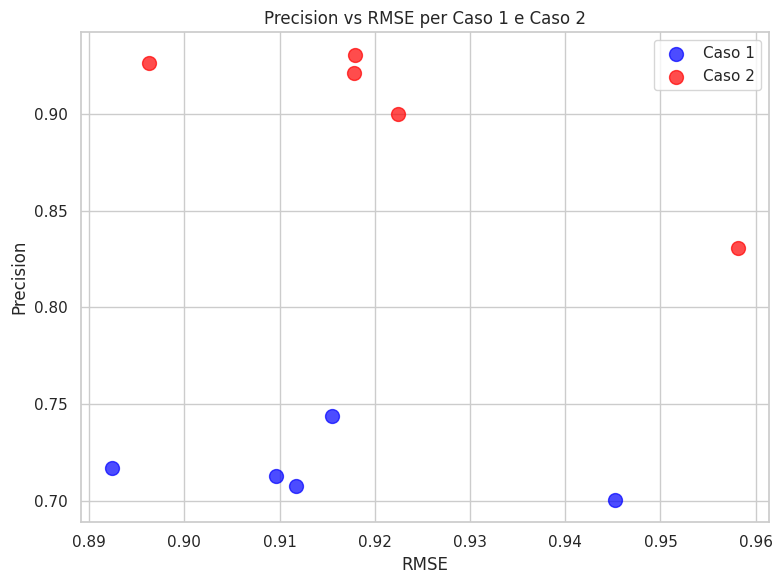

In [55]:
# Dati per precisione vs RMSE
precision_case_1 = [0.7167, 0.7004, 0.7074, 0.7439, 0.7130]
precision_case_2 = [0.9263, 0.8307, 0.8998, 0.9307, 0.9210]

rmse_case_1 = [0.8924, 0.9452, 0.9117, 0.9155, 0.9096]
rmse_case_2 = [0.8963, 0.9581, 0.9224, 0.9179, 0.9178]

# Creazione del grafico scatter
plt.figure(figsize=(8, 6))
plt.scatter(rmse_case_1, precision_case_1, color='blue', label='Caso 1', s=100, alpha=0.7)
plt.scatter(rmse_case_2, precision_case_2, color='red', label='Caso 2', s=100, alpha=0.7)

# Etichette e titolo
plt.xlabel('RMSE')
plt.ylabel('Precision')
plt.title('Precision vs RMSE per Caso 1 e Caso 2')
plt.legend()

plt.tight_layout()
plt.show()


In [57]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Carica il file con i voti attesi
expected_ratings = pd.read_csv('top_10_movies__2005__media ratings.csv')

# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Rinomina la colonna 'movieId' in 'id' per uniformarla ai voti attesi
ratings.rename(columns={'movieId': 'id'}, inplace=True)

# Filtra solo gli utenti che hanno valutato i film nella lista dei top 10
filtered_ratings = ratings[ratings['id'].isin(expected_ratings['id'])]

# Imposta il numero di fold per la cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Esempio con 5-fold cross-validation

# Inizializza liste per memorizzare i risultati delle metriche per ogni fold
rmse_case1_list, mae_case1_list, r2_case1_list, precision_case1_list = [], [], [], []
rmse_case2_list, mae_case2_list, r2_case2_list, precision_case2_list = [], [], [], []

# Funzione per normalizzare i voti attesi (caso 2)
def normalize_rating(rating):
    if rating <= 0.24:
        return 0
    elif 0.25 <= rating <= 0.74:
        return 0.5
    elif 0.75 <= rating <= 1.25:
        return 1
    elif 1.26 <= rating <= 1.74:
        return 1.5
    elif 1.75 <= rating <= 2.25:
        return 2
    elif 2.26 <= rating <= 2.74:
        return 2.5
    elif 2.75 <= rating <= 3.25:
        return 3
    elif 3.26 <= rating <= 3.74:
        return 3.5
    elif 3.75 <= rating <= 4.25:
        return 4
    elif 4.26 <= rating <= 4.74:
        return 4.5
    else:
        return 5

# Esegui k-fold cross-validation
for train_index, test_index in kfold.split(filtered_ratings):
    train_set = filtered_ratings.iloc[train_index]
    test_set = filtered_ratings.iloc[test_index]

    # Unisci i voti attesi con i voti reali basati sull'ID del film nel test set
    merged_test_set = pd.merge(test_set, expected_ratings, on='id')

    # CASO 1: Calcolo delle metriche con i voti attesi originali (usando mean_rating)
    y_true = merged_test_set['rating']  # Voti reali degli utenti
    y_pred_case1 = merged_test_set['mean_rating']  # Voti attesi originali (mean_rating)

    rmse_case1_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case1)))
    mae_case1_list.append(mean_absolute_error(y_true, y_pred_case1))
    r2_case1_list.append(r2_score(y_true, y_pred_case1))
    precision_case1_list.append(sum(abs(y_true - y_pred_case1) <= 1) / len(y_true))

    # CASO 2: Normalizza i voti attesi (mean_rating) per il confronto
    merged_test_set['normalized_expected_rating'] = merged_test_set['mean_rating'].apply(normalize_rating)
    y_pred_case2 = merged_test_set['normalized_expected_rating']  # Voti attesi normalizzati

    rmse_case2_list.append(np.sqrt(mean_squared_error(y_true, y_pred_case2)))
    mae_case2_list.append(mean_absolute_error(y_true, y_pred_case2))
    r2_case2_list.append(r2_score(y_true, y_pred_case2))
    precision_case2_list.append(sum(abs(y_true - y_pred_case2) <= 1) / len(y_true))

# Risultati medi delle metriche per i due casi
print("CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case1_list)}')
print(f'MAE medio: {np.mean(mae_case1_list)}')
print(f'R-squared medio: {np.mean(r2_case1_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case1_list)}')

print("\nCASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:")
print(f'RMSE medio: {np.mean(rmse_case2_list)}')
print(f'MAE medio: {np.mean(mae_case2_list)}')
print(f'R-squared medio: {np.mean(r2_case2_list)}')
print(f'Precision (tolleranza ±1) media: {np.mean(precision_case2_list)}')


CASO 1 (Voti attesi originali) - Media su k-fold cross-validation:
RMSE medio: 0.8695556537950644
MAE medio: 0.6424994059397584
R-squared medio: 0.005866484321043863
Precision (tolleranza ±1) media: 0.7613557887887119

CASO 2 (Voti attesi normalizzati) - Media su k-fold cross-validation:
RMSE medio: 0.8727756532866227
MAE medio: 0.6315445634755916
R-squared medio: -0.0015175107541971489
Precision (tolleranza ±1) media: 0.9361527742399767


In [58]:
import pandas as pd

# Carica il dataset delle valutazioni (assicurati che il file 'ratings.csv' sia disponibile)
ratings = pd.read_csv('ratings.csv')

# Calcolo del numero di voti per utente
user_rating_count = ratings.groupby('userId').size()

# Statistiche della distribuzione dei voti per utente
user_rating_distribution_stats = user_rating_count.describe()

# Mostra le statistiche
print("Statistiche della distribuzione dei voti per utente:")
print(user_rating_distribution_stats)

# Mostra la distribuzione completa dei voti per gli utenti (opzionale: solo i primi 10 per esempio)
print("\nPrimi 10 utenti per numero di voti:")
print(user_rating_count.head(10))


Statistiche della distribuzione dei voti per utente:
count    270896.000000
mean         96.067454
std         205.719606
min           1.000000
25%          15.000000
50%          30.000000
75%          93.000000
max       18276.000000
dtype: float64

Primi 10 utenti per numero di voti:
userId
1      27
2      22
3      10
4      62
5      26
6       4
7      53
8     113
9      84
10     13
dtype: int64


In [59]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Calcolo del numero di voti per film e per utente
movie_rating_count = ratings.groupby('movieId').size()
user_rating_count = ratings.groupby('userId').size()

# Imposta i requisiti minimi per film e utenti basati sul 75° percentile
min_movie_ratings = np.percentile(movie_rating_count, 75)
min_user_ratings = np.percentile(user_rating_count, 75)

# Filtra i film e gli utenti che soddisfano i requisiti minimi
filtered_ratings = ratings[ratings['movieId'].isin(movie_rating_count[movie_rating_count >= min_movie_ratings].index)]
filtered_ratings = filtered_ratings[filtered_ratings['userId'].isin(user_rating_count[user_rating_count >= min_user_ratings].index)]

# Creazione della matrice utente-item (pivot)
user_item_matrix = filtered_ratings.pivot(index='userId', columns='movieId', values='rating')

# Riempi i NaN con 0 o lasciali come NaN a seconda dell'algoritmo
user_item_matrix.fillna(0, inplace=True)

# Converti la matrice utente-item in una matrice sparsa per ridurre l'uso di memoria
sparse_matrix = csr_matrix(user_item_matrix)

# Applica la decomposizione SVD per ridurre la dimensionalità
n_components = 50  # Numero di componenti latenti
svd = TruncatedSVD(n_components=n_components, random_state=42)
latent_matrix = svd.fit_transform(sparse_matrix)

# Mostra la dimensione della matrice ridotta
print(f"Matrice ridotta a: {latent_matrix.shape}")


Matrice ridotta a: (67847, 50)


In [60]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# Carica il dataset delle valutazioni
ratings = pd.read_csv('ratings.csv')

# Calcolo del numero di voti per film e per utente
movie_rating_count = ratings.groupby('movieId').size()
user_rating_count = ratings.groupby('userId').size()

# Imposta i requisiti minimi per film e utenti basati sulla media
min_movie_ratings = movie_rating_count.mean()
min_user_ratings = user_rating_count.mean()

# Filtra i film e gli utenti che soddisfano i requisiti minimi
filtered_ratings = ratings[ratings['movieId'].isin(movie_rating_count[movie_rating_count >= min_movie_ratings].index)]
filtered_ratings = filtered_ratings[filtered_ratings['userId'].isin(user_rating_count[user_rating_count >= min_user_ratings].index)]

# Creazione della matrice utente-item (pivot)
user_item_matrix = filtered_ratings.pivot(index='userId', columns='movieId', values='rating')

# Riempi i NaN con 0 (opzionale)
user_item_matrix.fillna(0, inplace=True)

# Converti la matrice utente-item in una matrice sparsa per ridurre l'uso di memoria
sparse_matrix = csr_matrix(user_item_matrix)

# Applica la decomposizione SVD per ridurre la dimensionalità
n_components = 50  # Numero di componenti latenti
svd = TruncatedSVD(n_components=n_components, random_state=42)
latent_matrix = svd.fit_transform(sparse_matrix)

# Mostra la dimensione della matrice ridotta
print(f"Matrice ridotta a: {latent_matrix.shape}")


Matrice ridotta a: (65875, 50)


In [4]:
# Ciclo su ogni utente nel test set
for user_id in test_set.index:
    # Verifica che l'user_id esista nella matrice del test set prima di procedere
    if user_id in test_set.index:
        y_true = test_set.loc[user_id][test_set.loc[user_id] > 0]  # Voti reali dell'utente nel test set
        if len(y_true) == 0:  # Se l'utente non ha voti reali nel test set
            continue  # Salta questo utente
    else:
        print(f"User {user_id} non trovato nel test set.")
        continue  # Salta questo utente


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, precision_score, recall_score, f1_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

# Funzione per ottenere i voti previsti basata sull'item-based CF
def get_predicted_ratings(latent_matrix, user_ratings):
    # Calcola la similarità tra i film
    item_similarity = cosine_similarity(latent_matrix.T)

    # Calcola i voti previsti come somma pesata delle valutazioni dei film simili
    predicted_ratings = item_similarity.dot(user_ratings)

    return predicted_ratings

# Funzione per calcolare le metriche
def calculate_metrics(y_true, y_pred, threshold=3):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Precisione, Recall e F1 basati su una soglia (es. 3 per classificare come positivo/negativo)
    y_true_binary = np.where(np.array(y_true) >= threshold, 1, 0)  # Voti reali sopra la soglia considerati positivi
    y_pred_binary = np.where(np.array(y_pred) >= threshold, 1, 0)  # Voti predetti sopra la soglia considerati positivi

    precision = precision_score(y_true_binary, y_pred_binary, zero_division=1)
    recall = recall_score(y_true_binary, y_pred_binary, zero_division=1)
    f1 = f1_score(y_true_binary, y_pred_binary, zero_division=1)

    return rmse, mae, r2, precision, recall, f1

# Applica la cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inizializza liste per memorizzare i risultati delle metriche per ogni fold
rmse_list, mae_list, r2_list = [], [], []
precision_list, recall_list, f1_list = [], [], []

# Cross-validation
for train_index, test_index in kf.split(user_item_matrix):
    # Dividi il dataset in train e test
    train_set = user_item_matrix.iloc[train_index]
    test_set = user_item_matrix.iloc[test_index]

    # Applica l'SVD solo al train set
    svd = TruncatedSVD(n_components=50, random_state=42)
    latent_matrix_train = svd.fit_transform(train_set)

    # Ciclo su ogni utente nel test set
for user_id in test_set.index:
    # Verifica che l'user_id esista nella matrice del test set prima di procedere
    if user_id in test_set.index:
        y_true = test_set.loc[user_id][test_set.loc[user_id] > 0]  # Voti reali dell'utente nel test set
        if len(y_true) == 0:  # Se l'utente non ha voti reali nel test set
            continue  # Salta questo utente
    else:
        print(f"User {user_id} non trovato nel test set.")
        continue  # Salta questo utente


        # Ottieni i voti dell'utente nel train set
        user_ratings_train = train_set.loc[user_id].fillna(0)

        # Calcola i voti previsti basandosi sui voti del train set
        y_pred = get_predicted_ratings(latent_matrix_train, user_ratings_train)

        # Confronta solo i voti per i film effettivamente valutati nel test set
        y_pred_filtered = y_pred[y_true.index]

        # Calcola le metriche
        rmse, mae, r2, precision, recall, f1 = calculate_metrics(y_true, y_pred_filtered)

        # Memorizza i risultati per ogni utente
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

# Mostra i risultati medi delle metriche
print(f"RMSE medio: {np.mean(rmse_list)}")
print(f"MAE medio: {np.mean(mae_list)}")
print(f"R-squared medio: {np.mean(r2_list)}")
print(f"Precision media: {np.mean(precision_list)}")
print(f"Recall media: {np.mean(recall_list)}")
print(f"F1-score medio: {np.mean(f1_list)}")


RMSE medio: nan
MAE medio: nan
R-squared medio: nan
Precision media: nan
Recall media: nan
F1-score medio: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [9]:
print(test_set.index)  # Controlla se '16' è presente


Index([    16,     24,     30,    123,    132,    150,    160,    166,    173,
          230,
       ...
       270684, 270704, 270720, 270727, 270734, 270759, 270793, 270859, 270869,
       270879],
      dtype='int64', name='userId', length=13570)


In [10]:
print(f"Tipo di indice nel test set: {type(test_set.index[0])}")
print(f"Tipo di user_id: {type(user_id)}")


Tipo di indice nel test set: <class 'numpy.int64'>
Tipo di user_id: <class 'int'>
